In [1]:
import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave
import matplotlib.patches as mpatches
from random import choice

%matplotlib widget
plt.style.use('presentation.mplstyle')


c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [7]:
all_analysis_folders = get_analysis_folders()


In [8]:
plates = [52,84,938,941,1076,94,152,102,76]
plates = [1076,94,52]
plates = [102, 152, 52, 56, 76, 792, 81, 83, 84, 877, 89, 91, 94,1076]
plates = [52,84,941,94,152,102,76,83]
# plates = ["127_20220705","129_20220711","130_20220707","1014_20220525","1023_20220502","1048_20220506", "1045_20220504","1035_20220518","1037_20220523","1042_20220523","1053_20220413"] #analysis C2

plates = [1014,130,1023,1048,1045,1053] #C2
plates = [1014,130,1023,1045,1053] #C2
plates = [52,94,83,1045,1048,1076,1042,30,32,33]

analysis_folders = all_analysis_folders.loc[all_analysis_folders['Plate'].isin(plates)]

In [9]:
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders)
folders,global_hypha_info = get_global_hypha_info_from_analysis(analysis_folders)
folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders)

C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE\1045_20220504\Analysis_1045_20220504_189_Version1\time_hypha_info\hyph_info_44.json
C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE\1045_20220504\Analysis_1045_20220504_189_Version1\time_hypha_info\hyph_info_45.json
C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE\1045_20220504\Analysis_1045_20220504_189_Version1\time_hypha_info\hyph_info_46.json
C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE\1045_20220504\Analysis_1045_20220504_189_Version1\time_hypha_info\hyph_info_47.json
C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE\1045_20220504\Analysis_1045_20220504_189_Version1\time_hypha_info\hyph_info_54.json
C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE\1045_20220504\Analysis_1045_20220504_189_Version1\time_hypha_info\hyph_info_55.json
C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE\1045_20220504\Analysis_1045_20220504_189_Version1\time_hypha_info\hyph_info_56.json
C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE\1045_20220504\Analys

In [12]:
def select_movement(plate,time_hypha_info,min_num_occ =1):
    time_hypha_plate = time_hypha_info.loc[time_hypha_info['unique_id'].astype(str).str[:len(str(plate))]==str(plate)]
    select = time_hypha_plate
    max_speeds = select.groupby('end').max()['speed']
    correct_tracks = max_speeds.loc[max_speeds<=450]
    select = select.loc[select['end'].isin(correct_tracks.index)]
    select = select.loc[select['distance_final_pos']>=400]
    select = select.loc[select['speed'].between(80,400)]
    select = select.loc[select['in_ROI']=='True']
    num_occ = select.groupby('end').count()['speed']
    correct_tracks = num_occ.loc[num_occ>=min_num_occ]
    select = select.loc[select['end'].isin(correct_tracks.index)]
    select_movements = select 
    return(select_movements)

def get_average_time_data(plate,time_hypha_info,min_num_occ =1):
    select_movements = select_movement(plate,time_hypha_info,min_num_occ)
    group =select_movements.groupby(['time_since_begin_h'])['speed']
    data = group.median()
    dy = group.std()/np.sqrt(group.count())

    return(data,dy,select_movements)

In [14]:
data,dy,select_movements = get_average_time_data(32,time_hypha_info,20)


In [25]:
time_hypha_info_plate= time_hypha_info.loc[time_hypha_info['Plate']==32]

(100.0, 350.0)

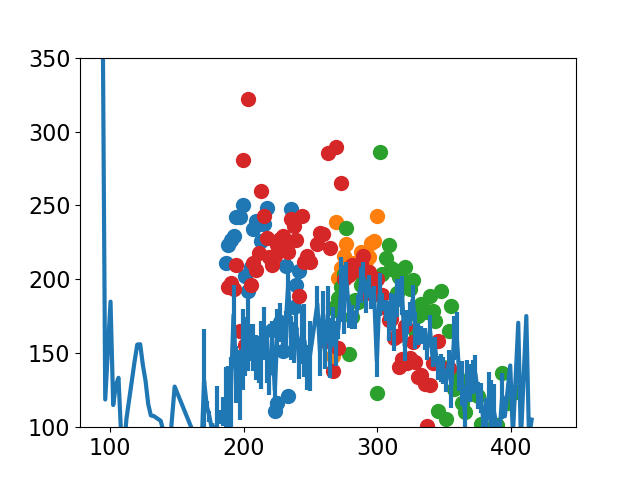

In [30]:
fig,ax = plt.subplots()

select = select_movements.loc[select_movements['end']==546940]
ax.scatter(select['time_since_begin_h']/pd.Timedelta(hours = 1),select['speed'])
select = time_hypha_info_plate.loc[time_hypha_info_plate['end']==64188]

ax.scatter(select['time_since_begin_h']/pd.Timedelta(hours = 1),select['speed'])
select = time_hypha_info_plate.loc[time_hypha_info_plate['end']==64202]
ax.scatter(select['time_since_begin_h']/pd.Timedelta(hours = 1),select['speed'])
select = time_hypha_info_plate.loc[time_hypha_info_plate['end']==633995]
ax.scatter(select['time_since_begin_h']/pd.Timedelta(hours = 1),select['speed'])
ax.errorbar(data.index/pd.Timedelta(hours = 1),data, yerr=dy,label='average')
ax.set_ylim(100,350)

In [31]:
def select_movement(plate,time_hypha_info,min_num_occ =1):
    time_hypha_plate = time_hypha_info.loc[time_hypha_info['unique_id'].astype(str).str[:len(str(plate))]==str(plate)]
    select = time_hypha_plate
    max_speeds = select.groupby('end').max()['speed']
    correct_tracks = max_speeds.loc[max_speeds<=450]
    select = select.loc[select['end'].isin(correct_tracks.index)]
    select = select.loc[select['distance_final_pos']>=400]
    select = select.loc[select['speed'].between(80,400)]
    select = select.loc[select['in_ROI']=='True']
    num_occ = select.groupby('end').count()['speed']
    correct_tracks = num_occ.loc[num_occ>=min_num_occ]
    select = select.loc[select['end'].isin(correct_tracks.index)]
    select_movements = select 
    return(select_movements)

def get_average_time_data(plate,time_hypha_info,min_num_occ =1):
    select_movements = select_movement(plate,time_hypha_info,min_num_occ)
    group =select_movements.groupby(['time_since_begin_h'])['speed']
    data = group.median()
    dy = group.std()/np.sqrt(group.count())

    return(data,dy,select_movements)

def get_hyphae_hull(plate,analysis_folders):
    selection = analysis_folders.loc[analysis_folders['Plate']==plate]
    analysis_dirs = selection["total_path"]
    folders = pd.DataFrame()
    for analysis_dir in analysis_dirs:
        hyphae_hull=[]
        path_time_hypha = os.path.join(analysis_dir, "time_hull_info")
        if os.path.exists(path_time_hypha):
            path_save = os.path.join(analysis_dir, "folder_info.json")
            folders_plate = pd.read_json(path_save)
            folders_plate = folders_plate.reset_index()
            folders_plate = folders_plate.sort_values("datetime")
            json_paths = os.listdir(path_time_hypha)
            tables = []
            for path in json_paths:
                index = int(path.split("_")[-1].split(".")[0])
                line = folders_plate.iloc[index]
                hyphae = np.load(os.path.join(path_time_hypha, path))
                hyphae_hull.append(hyphae)
    return(hyphae_hull)

In [ ]:
datas = {}
dys = {}
hull_speeds_dic = {}
hull_time_dic = {}

for plate in plates:
    hull_speeds = []
    hull_time = []
    time_hypha_plate = time_hypha_info.loc[time_hypha_info['unique_id'].astype(str).str[:len(str(plate))]==str(plate)]
    
    fig,ax = plt.subplots()
    data,dy,select_movements = get_average_time_data(plate,time_hypha_info,2)
    hyphae_hull = get_hyphae_hull(plate,analysis_folders)
    if len(hyphae_hull)>0:
        label = 'hull pusher'
        for t in range(1,len(time_hypha_plate['timestep'].unique())-1):
            select = time_hypha_plate.loc[time_hypha_plate['timestep']==t]
            select = select.loc[select['end'].isin(hyphae_hull[t-1]) |select['end'].isin(hyphae_hull[t]) |select['end'].isin(hyphae_hull[t+1])]
            select = select.loc[select['speed'].between(150,350)]
            if len(select)>0:
                ax.scatter(select['time_since_begin_h'].iloc[0]/pd.Timedelta(hours = 1),np.mean(select["speed"]),color='black')
                ax.errorbar(select['time_since_begin_h'].iloc[0]/pd.Timedelta(hours = 1),np.mean(select["speed"]),np.std(select["speed"])/np.sqrt(len(select)),color='black',label=label)
                label = None
                hull_speeds.append(np.mean(select["speed"]))
                hull_time.append(select['time_since_begin_h'].iloc[0]/pd.Timedelta(hours = 1))
                
            select = time_hypha_plate.loc[time_hypha_plate['timestep']==t]
            # select = select.loc[select['end'].isin(hyphae_hull[t-1]) |select['end'].isin(hyphae_hull[t]) |select['end'].isin(hyphae_hull[t+1])]
        # ax.plot(data.index/pd.Timedelta(hours = 1),data)
        ax.errorbar(data.index/pd.Timedelta(hours = 1),data, yerr=dy,label='average')
        # ax.set_xlim(0,150)
        ax.set_ylim(150,350)
    datas[plate] = data
    dys[plate] = dy
    hull_speeds_dic[plate] = hull_speeds
    hull_time_dic[plate] = hull_time
    
    ax.legend()
    ax.set_title(f'{plate}')
    ax.set_xlabel('time since begin (h)')
    ax.set_ylabel('speed ($\mu m.h^{-1}$)')
    # break
    

C:\Users\coren\AppData\Local\Temp\ipykernel_1880\1796074556.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots()


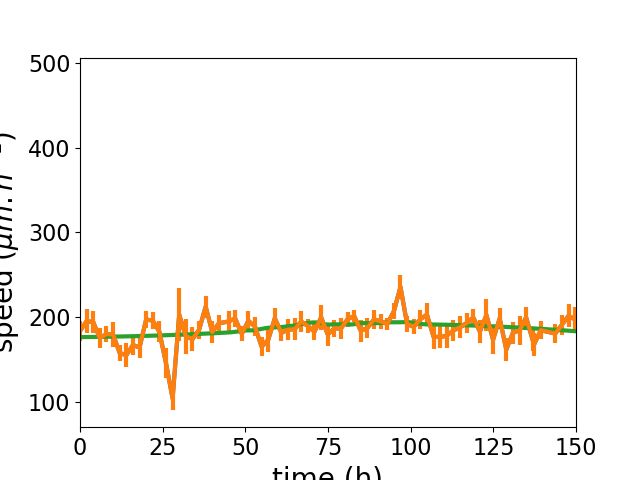

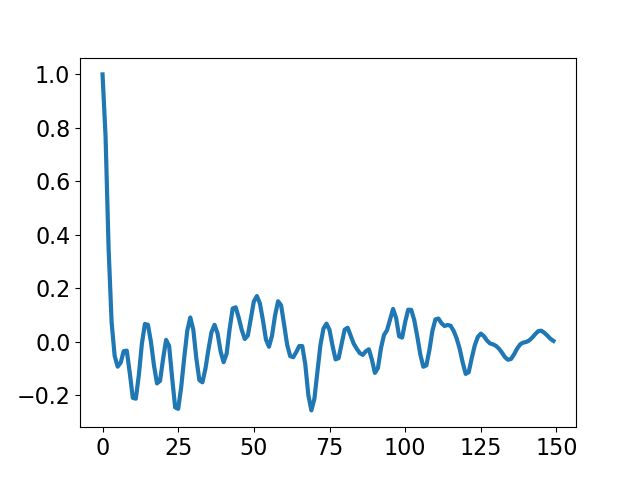

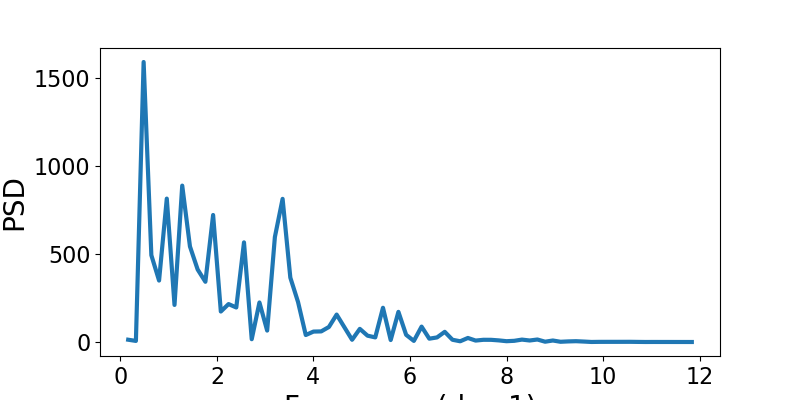

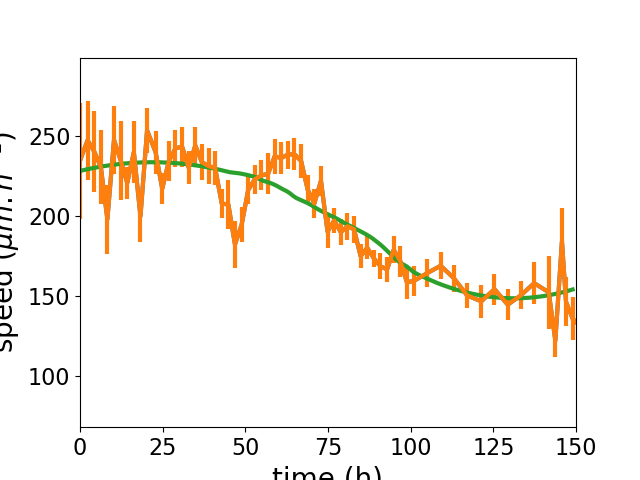

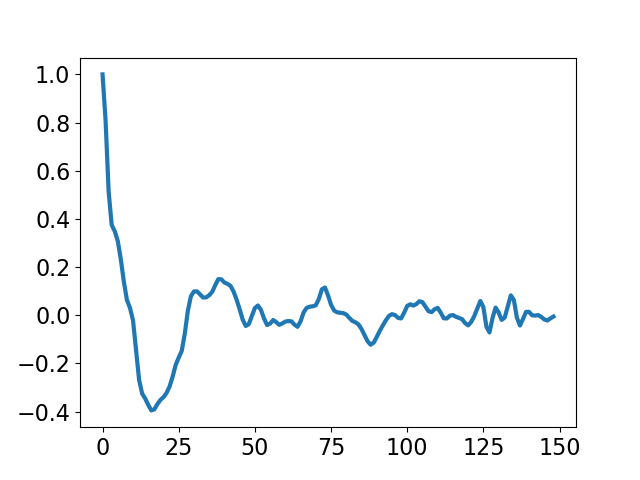

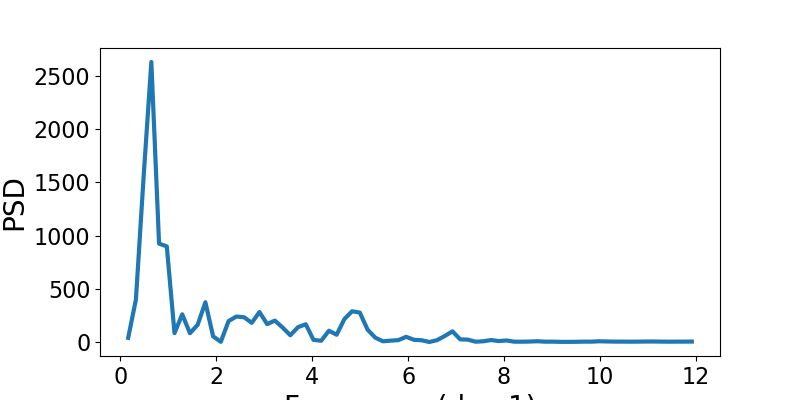

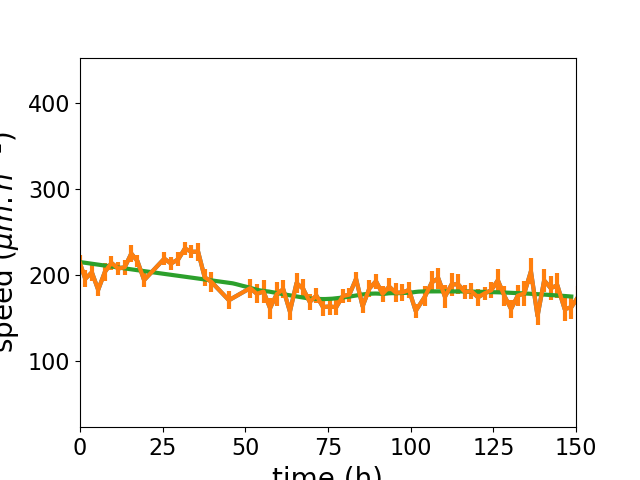

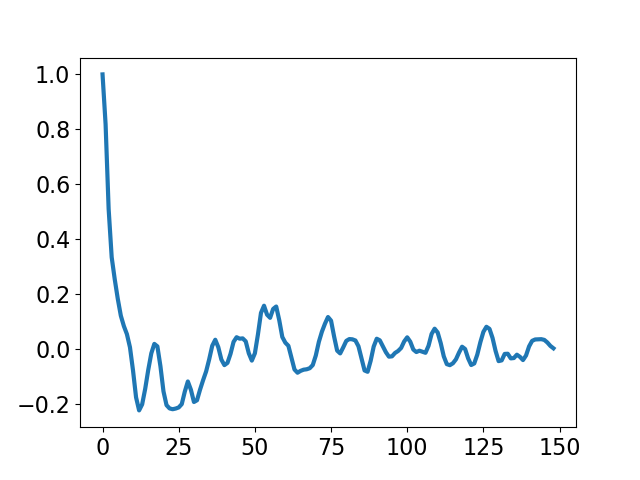

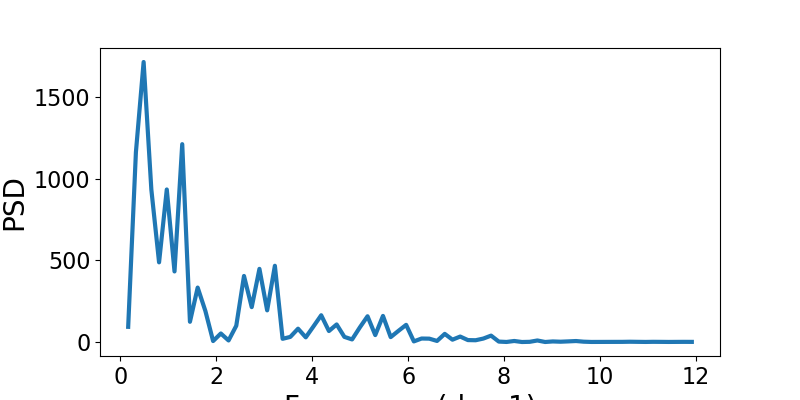

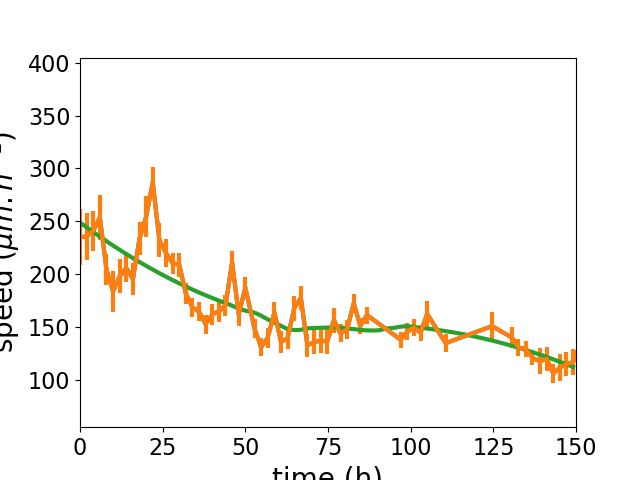

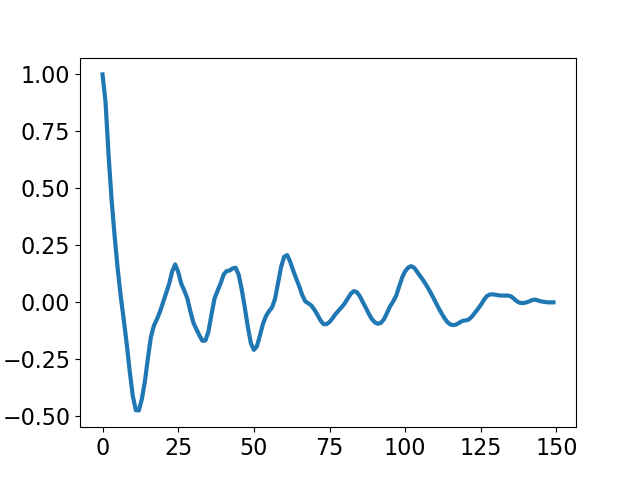

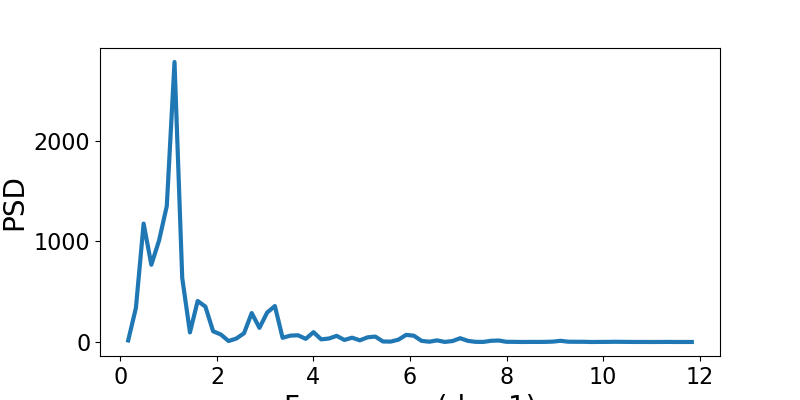

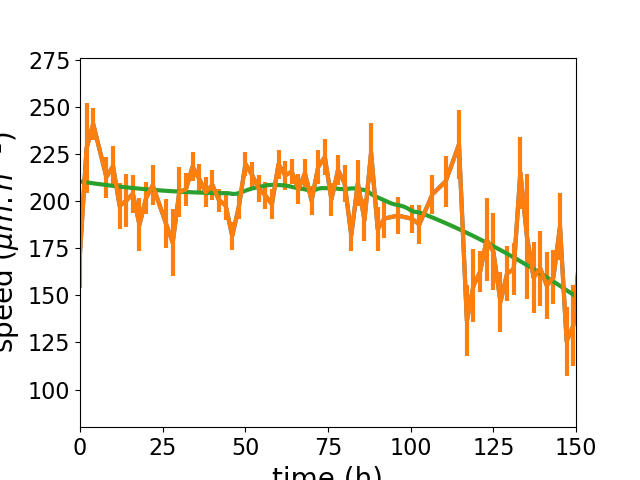

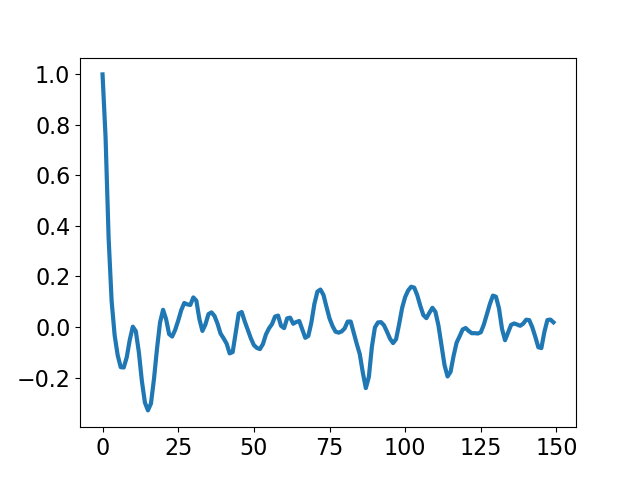

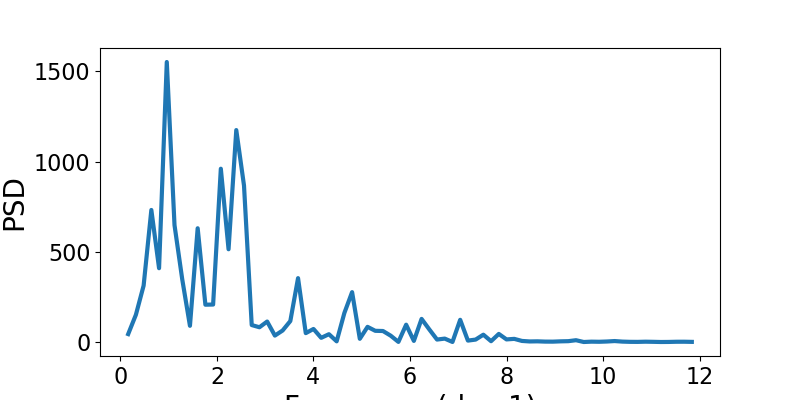

In [43]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import scipy as sp
plate = 83
for plate in plates:
    data,dy,select_movements = get_average_time_data(plate,time_hypha_info)
    fig,ax = plt.subplots()

    ax.plot(data.index/pd.Timedelta(hours = 1),data)
    plt.errorbar(data.index/pd.Timedelta(hours = 1),data, yerr=dy)
    ax.set_xlim(0,150)
    smooth_length = 91
    def autocorr(x):
        result = np.correlate(x, x, mode='full')
        return result[result.size // 2:]
    select = data.loc[data.index/pd.Timedelta(hours=1)<=150]
    xt,yt = select.index/pd.Timedelta(hours=1),select.values
    f = interp1d(xt, yt)
    frequ = 1
    deb = np.min(xt)
    end = np.max(xt)
    x = np.linspace(deb,end,int((end-deb)*frequ)+1)
    resampled = pd.DataFrame({'time':x,'speed':f(x)})
    yt_smooth = savgol_filter(resampled['speed'], smooth_length, 2)
    # yt_smooth = [np.mean(resampled['speed'])]*len(x)
    ax.plot(x,yt_smooth)
    ax.set_xlabel('time (h)')
    ax.set_ylabel('speed $(\mu m.h^{-1})$')
    signal = resampled['speed']-yt_smooth

    signal_ZMUV = (signal-np.mean(signal))/np.std(signal)
    s = signal_ZMUV
    autoc = autocorr(s)
    autoc = autoc/autoc.max()
    fig,ax = plt.subplots()
    ax.plot(autoc,label='linear regression')
    speed_fft = sp.fftpack.fft(s.values)
    speed_psd = np.abs(speed_fft) ** 2
    fftfreq = sp.fftpack.fftfreq(len(speed_psd))
    i = fftfreq > 0
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(24*frequ*fftfreq[i], speed_psd[i])
    ax.set_xlabel('Frequency (day-1)')
    ax.set_ylabel('PSD')

In [44]:
def get_hyphae_hull(plate,analysis_folders):
    selection = analysis_folders.loc[analysis_folders['Plate']==plate]
    analysis_dirs = selection["total_path"]
    folders = pd.DataFrame()
    for analysis_dir in analysis_dirs:
        hyphae_hull=[]
        path_time_hypha = os.path.join(analysis_dir, "time_hull_info")
        if os.path.exists(path_time_hypha):
            path_save = os.path.join(analysis_dir, "folder_info.json")
            folders_plate = pd.read_json(path_save)
            folders_plate = folders_plate.reset_index()
            folders_plate = folders_plate.sort_values("datetime")
            json_paths = os.listdir(path_time_hypha)
            tables = []
            for path in json_paths:
                index = int(path.split("_")[-1].split(".")[0])
                line = folders_plate.iloc[index]
                hyphae = np.load(os.path.join(path_time_hypha, path))
                hyphae_hull.append(hyphae)
    return(hyphae_hull)

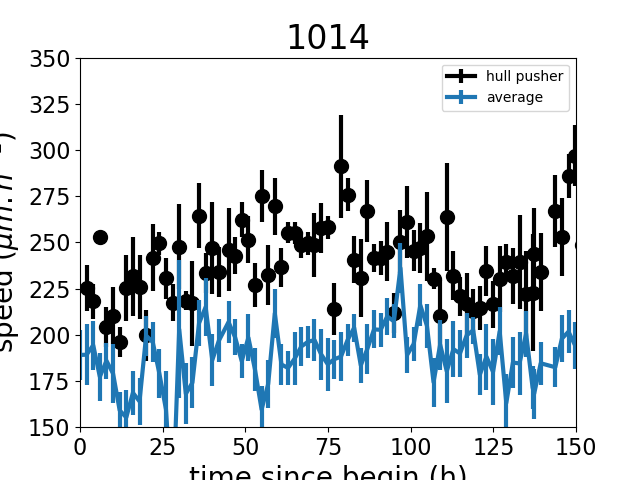

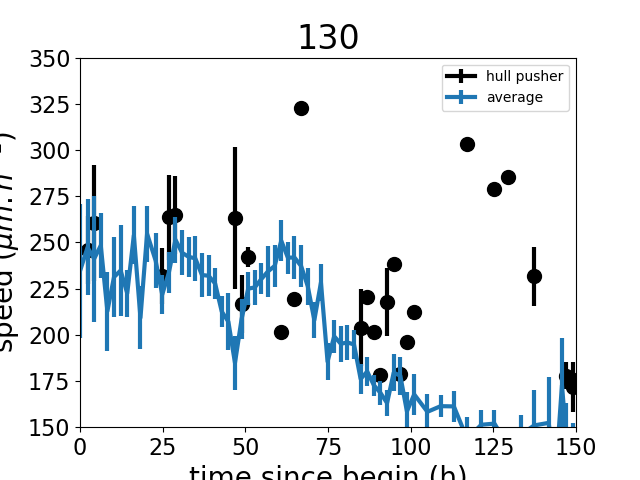

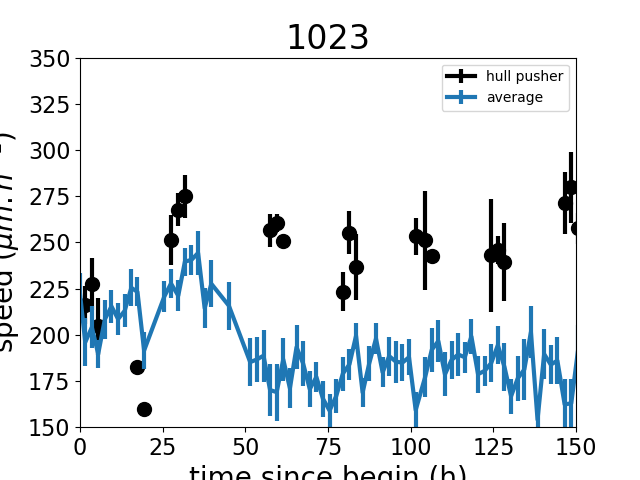

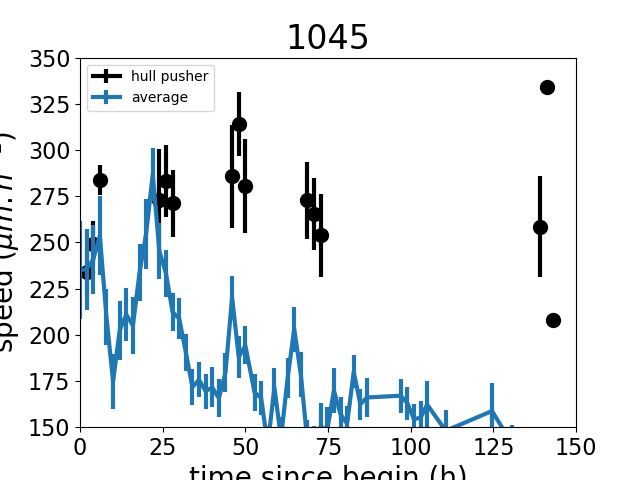

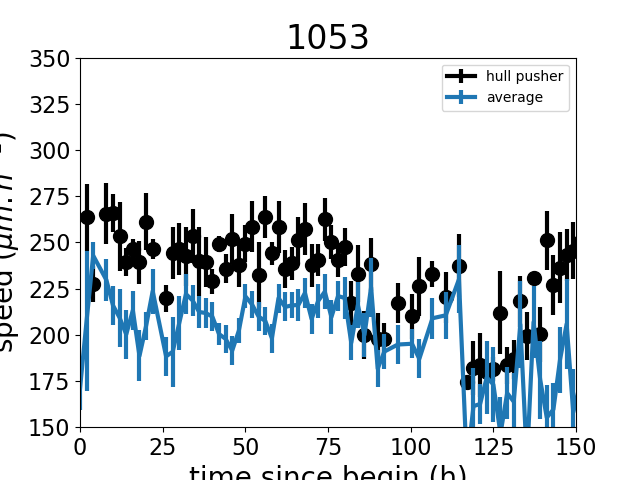

In [73]:
for plate in plates:
    time_hypha_plate = time_hypha_info.loc[time_hypha_info['unique_id'].astype(str).str[:len(str(plate))]==str(plate)]
    
    fig,ax = plt.subplots()
    data,dy,select_movements = get_average_time_data(plate,time_hypha_info,2)
    hyphae_hull = get_hyphae_hull(plate,analysis_folders)
    if len(hyphae_hull)>0:
        label = 'hull pusher'
        for t in range(1,len(time_hypha_plate['timestep'].unique())-1):
            select = time_hypha_plate.loc[time_hypha_plate['timestep']==t]
            select = select.loc[select['end'].isin(hyphae_hull[t-1]) |select['end'].isin(hyphae_hull[t]) |select['end'].isin(hyphae_hull[t+1])]
            select = select.loc[select['speed'].between(150,350)]
            if len(select)>0:
                ax.scatter(select['time_since_begin_h'].iloc[0]/pd.Timedelta(hours = 1),np.mean(select["speed"]),color='black')
                ax.errorbar(select['time_since_begin_h'].iloc[0]/pd.Timedelta(hours = 1),np.mean(select["speed"]),np.std(select["speed"])/np.sqrt(len(select)),color='black',label=label)
                label = None
            select = time_hypha_plate.loc[time_hypha_plate['timestep']==t]
            # select = select.loc[select['end'].isin(hyphae_hull[t-1]) |select['end'].isin(hyphae_hull[t]) |select['end'].isin(hyphae_hull[t+1])]
        # ax.plot(data.index/pd.Timedelta(hours = 1),data)
        ax.errorbar(data.index/pd.Timedelta(hours = 1),data, yerr=dy,label='average')
        ax.set_xlim(0,150)
        ax.set_ylim(150,350)
    ax.legend()
    ax.set_title(f'{plate}')
    # break
    ax.set_xlabel('time since begin (h)')
    ax.set_ylabel('speed ($\mu m.h^{-1}$)')

(0.0, 150.0)

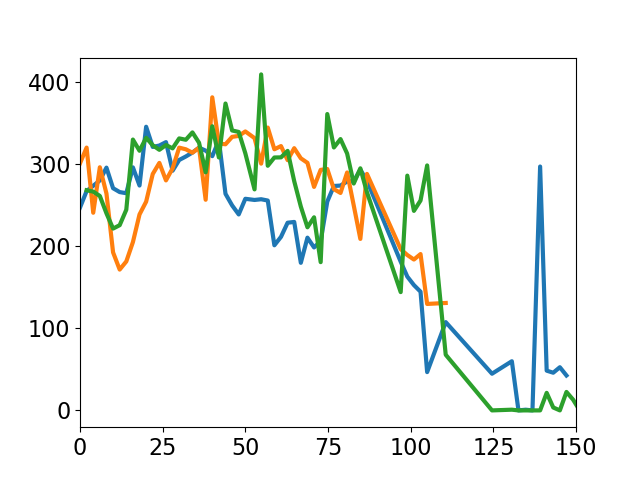

In [68]:
fig,ax = plt.subplots()
table = time_hypha_info.loc[time_hypha_info['Plate']==1045]
table = table.loc[table['end']==39]
table = table.sort_values('time_since_begin_h')
ax.plot(table['time_since_begin_exp'],table['speed'])
table = time_hypha_info.loc[time_hypha_info['Plate']==1045]

table = table.loc[table['end']==41]
table = table.sort_values('time_since_begin_h')
ax.plot(table['time_since_begin_exp'],table['speed'])
table = time_hypha_info.loc[time_hypha_info['Plate']==1045]


table = table.loc[table['end']==50182]
table = table.sort_values('time_since_begin_h')
ax.plot(table['time_since_begin_exp'],table['speed'])
ax.set_xlim(0,150)

In [67]:
table.columns

Index(['end', 'pos_x', 'pos_y', 'time_since_begin_exp', 'distance_final_pos',
       'timedelta', 'time_since_emergence', 'speed', 'timestep',
       'timestep_init', 'time_init', 'degree', 'width_tip_edge', 'av_width',
       'has_reached_final_pos', 'in_ROI', 'time_since_begin_h', 'folder',
       'Plate', 'unique_id', 'datetime', 'PrincePos', 'root', 'strain',
       'medium', 'width_root_edge'],
      dtype='object')

In [51]:
select = select_movement(plate,time_hypha_info,min_num_occ =50)

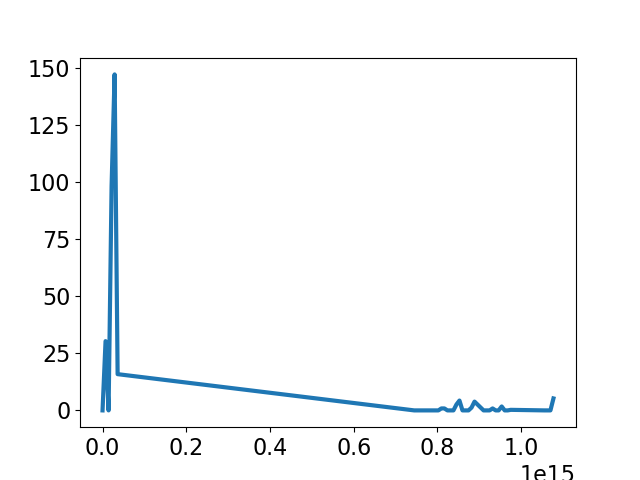

In [50]:
fig, ax = plt.subplots()
select = table.loc[table['end']==5]
select = select.sort_values('time_since_begin_h')
ax.plot(select['time_since_begin_h'],select['speed'])

(0.0, 150.0)

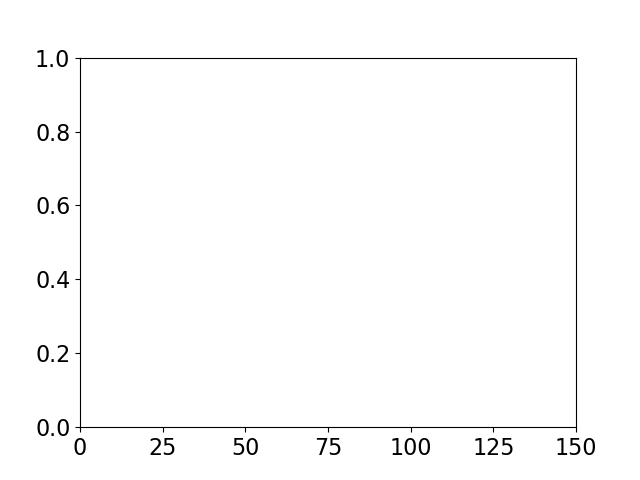

In [284]:
fig,ax = plt.subplots()
hyphae_hull = get_hyphae_hull(plate,analysis_folders)
for t in range(1,len(time_hypha_plate['timestep'].unique())-1):
    select = time_hypha_plate.loc[time_hypha_plate['timestep']==t]
    select = select.loc[select['end'].isin(hyphae_hull[t-1]) |select['end'].isin(hyphae_hull[t]) |select['end'].isin(hyphae_hull[t+1])]
    select = select.loc[select['speed'].between(150,350)]
    if len(select)>0:
        # print(t,select['speed'])
        ax.scatter(select['time_since_begin_h'].iloc[0]/pd.Timedelta(hours = 1),np.mean(select["speed"]))
        ax.errorbar(select['time_since_begin_h'].iloc[0]/pd.Timedelta(hours = 1),np.mean(select["speed"]),np.std(select["speed"])/np.sqrt(len(select)))
        
ax.set_xlim(0,150)
# ax.set_ylim(150,300)

(0.0, 150.0)

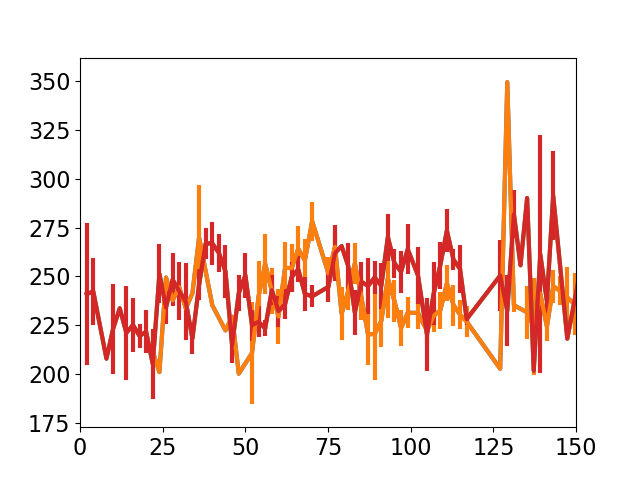

In [261]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import scipy as sp
time_hypha_plate = time_hypha_info.loc[time_hypha_info['unique_id'].astype(str).str[:len(str(plate))]==str(plate)]
select_movements = time_hypha_plate.loc[time_hypha_plate['speed'].between(200,350)]
bound = np.median(select_movements['pos_x'])

fig,ax = plt.subplots()
select_left = select_movements.loc[select_movements['pos_x']<=bound]
group =select_left.groupby(['time_since_begin_h'])['speed']
data = group.median()
dy = group.std()/np.sqrt(group.count())
ax.plot(data.index/pd.Timedelta(hours = 1),data)
plt.errorbar(data.index/pd.Timedelta(hours = 1),data, yerr=dy)
select_right = select_movements.loc[select_movements['pos_x']>bound]
group =select_right.groupby(['time_since_begin_h'])['speed']
data = group.median()
dy = group.std()/np.sqrt(group.count())
ax.plot(data.index/pd.Timedelta(hours = 1),data)
plt.errorbar(data.index/pd.Timedelta(hours = 1),data, yerr=dy)
ax.set_xlim(0,150)


In [12]:
select

,end,pos_x,pos_y,time_since_begin_exp,distance_final_pos,timedelta,time_since_emergence,speed,timestep,timestep_init,...,width_root_edge,time_since_begin_h,folder,Plate,unique_id,datetime,PrincePos,root,strain,medium
46,66,11876,7242,0.0,87.823687,2.283333,0.0,0.0,0,0,...,-1.0,0 days,20220707_1458_Plate07,52.0,5.220221e+09,2022-07-07 14:58:00,7.0,'Carrot','A5','001P100N100C'
49,84,19008,23960,0.0,6303.922985,2.283333,0.0,272.699853,0,0,...,-1.0,0 days,20220707_1458_Plate07,52.0,5.220221e+09,2022-07-07 14:58:00,7.0,'Carrot','A5','001P100N100C'
50,85,19065,22164,0.0,1438.113,2.283333,0.0,79.140763,0,0,...,-1.0,0 days,20220707_1458_Plate07,52.0,5.220221e+09,2022-07-07 14:58:00,7.0,'Carrot','A5','001P100N100C'
67,204,21917,23822,0.0,324.236025,2.283333,0.0,4.405135,0,0,...,-1.0,0 days,20220707_1458_Plate07,52.0,5.220221e+09,2022-07-07 14:58:00,7.0,'Carrot','A5','001P100N100C'


In [44]:
t = 5
selection = time_hypha_plate.loc[time_hypha_plate['timestep']<=t]
posx = selection['pos_x']
posy = selection['pos_y']

In [38]:
from scipy import spatial
nodes = np.array([posx,posy]).transpose()
hull = spatial.ConvexHull(nodes)

In [46]:
from shapely.geometry import Polygon, Point

polygon = Polygon([nodes[vertice] for vertice in hull.vertices])
selection.iloc[[vertice for vertice in hull.vertices]]

,end,pos_x,pos_y,time_since_begin_exp,distance_final_pos,timedelta,time_since_emergence,speed,timestep,timestep_init,...,width_root_edge,time_since_begin_h,folder,Plate,unique_id,datetime,PrincePos,root,strain,medium
120872,49388,23974,43076,8.283333,3.0,2.0,4.0,0.0,4,2,...,-1.0,0 days 08:17:00,20220707_2315_Plate07,52.0,5.220221e+09,2022-07-07 23:15:00,7.0,'Carrot','A5','001P100N100C'
120889,66821,5471,39223,8.283333,207.407811,2.0,0.0,0.0,4,4,...,-1.0,0 days 08:17:00,20220707_2315_Plate07,52.0,5.220221e+09,2022-07-07 23:15:00,7.0,'Carrot','A5','001P100N100C'
87,857,9775,6862,0.0,323.595426,2.283333,0.0,15.714144,0,0,...,-1.0,0 days 00:00:00,20220707_1458_Plate07,52.0,5.220221e+09,2022-07-07 14:58:00,7.0,'Carrot','A5','001P100N100C'
195,41395,10513,6488,2.283333,104.177733,2.0,0.0,26.259635,1,1,...,-1.0,0 days 02:17:00,20220707_1715_Plate07,52.0,5.220221e+09,2022-07-07 17:15:00,7.0,'Carrot','A5','001P100N100C'
120868,49278,22138,1217,8.283333,1.0,2.0,4.0,0.0,4,2,...,-1.0,0 days 08:17:00,20220707_2315_Plate07,52.0,5.220221e+09,2022-07-07 23:15:00,7.0,'Carrot','A5','001P100N100C'
114712,57864,22423,2816,6.283333,45.01111,2.0,0.0,11.681703,3,3,...,-1.0,0 days 06:17:00,20220707_2115_Plate07,52.0,5.220221e+09,2022-07-07 21:15:00,7.0,'Carrot','A5','001P100N100C'


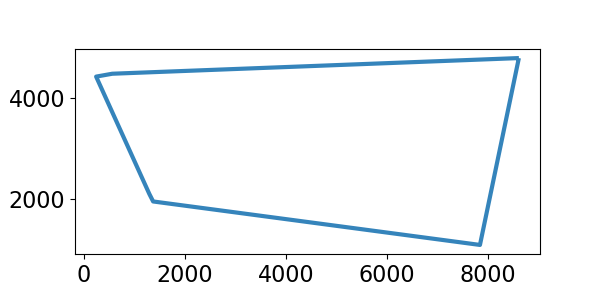

In [43]:
from shapely.affinity import affine_transform, rotate
import geopandas as gpd
fig, ax = plt.subplots(figsize=(6, 3))

p = affine_transform(polygon, [0.2, 0, 0, -0.2, 0, 0])
p = rotate(p, 90, origin=(0, 0))
p = gpd.GeoSeries(p)
try:
    _ = p.boundary.plot(ax=ax, alpha=0.9)
except ValueError:
    print(p)

Text(0, 0.5, 'PSD')

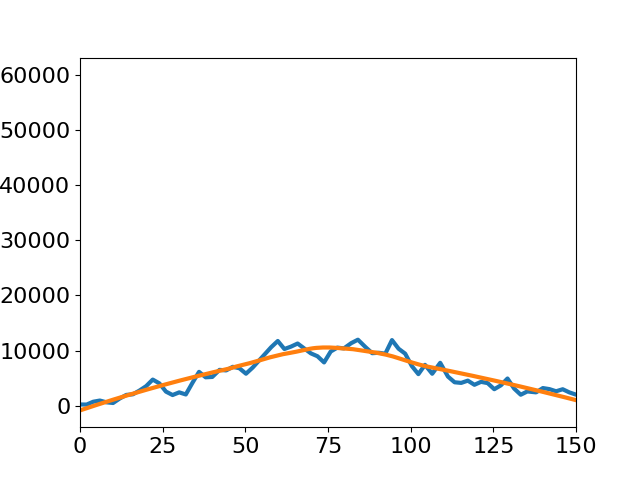

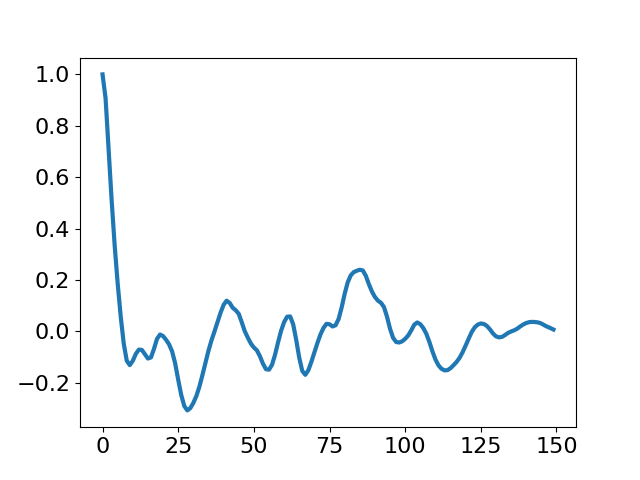

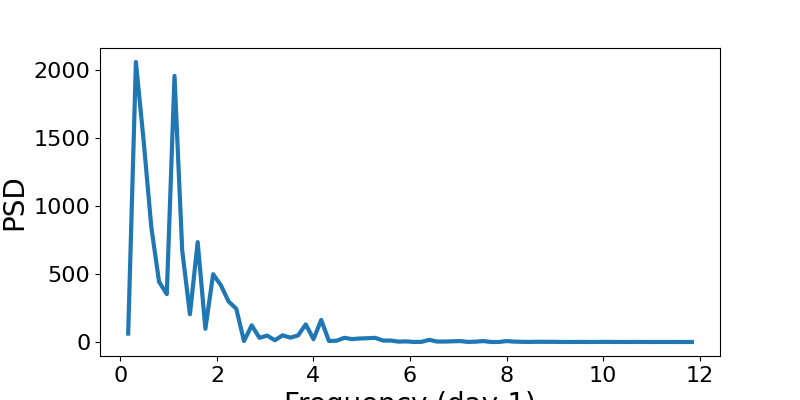

In [201]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

time_hypha_plate = time_hypha_info.loc[time_hypha_info['unique_id'].astype(str).str[:len(str(plate))]==str(plate)]
select_movements = time_hypha_plate.loc[time_hypha_plate['speed'].between(200,350)]
data = select_movements.groupby(['time_since_begin_h'])['speed'].count()*select_movements.groupby(['time_since_begin_h'])['speed'].median()

fig,ax = plt.subplots()

ax.plot(data.index/pd.Timedelta(hours = 1),data)
ax.set_xlim(0,150)
smooth_length = 91
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]
select = data.loc[data.index/pd.Timedelta(hours=1)<=150]
xt,yt = select.index/pd.Timedelta(hours=1),select.values
f = interp1d(xt, yt)
frequ = 1
deb = np.min(xt)
end = np.max(xt)
x = np.linspace(deb,end,int((end-deb)*frequ)+1)
resampled = pd.DataFrame({'time':x,'speed':f(x)})
yt_smooth = savgol_filter(resampled['speed'], smooth_length, 2)
# yt_smooth = [np.mean(resampled['speed'])]*len(x)

ax.plot(x,yt_smooth)
signal = resampled['speed']-yt_smooth

signal_ZMUV = (signal-np.mean(signal))/np.std(signal)
s = signal_ZMUV
autoc = autocorr(s)
autoc = autoc/autoc.max()
fig,ax = plt.subplots()
ax.plot(autoc,label='linear regression')
speed_fft = sp.fftpack.fft(s.values)
speed_psd = np.abs(speed_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(speed_psd))
i = fftfreq > 0
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(24*frequ*fftfreq[i], speed_psd[i])
ax.set_xlabel('Frequency (day-1)')
ax.set_ylabel('PSD')

Text(0, 0.5, 'PSD')

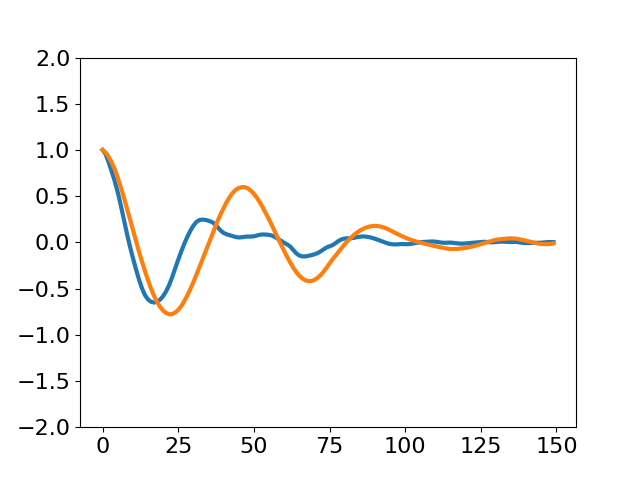

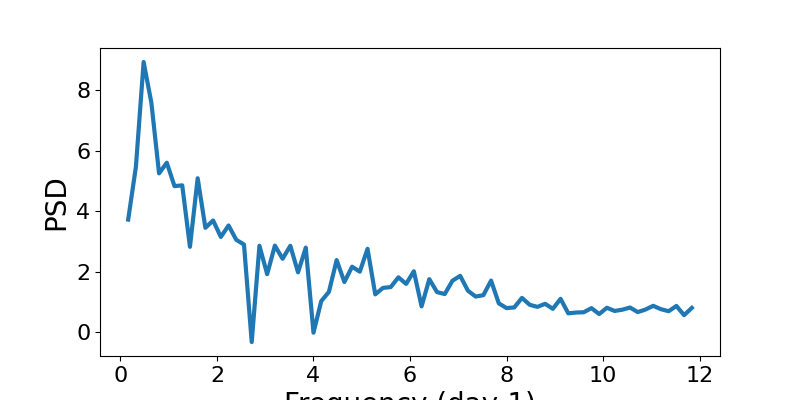

In [180]:
plt.close("all")
signals = []
fig, ax = plt.subplots()
for smooth_length in [51,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate]
    table = table.loc[table["time_since_begin"]/pd.Timedelta(hours=1)<=150]
    xt,yt = table['time_since_begin']/pd.Timedelta(hours=1),table['tot_length_study']
    f = interp1d(xt, yt)
    frequ = 1
    deb = np.min(xt)
    end = np.max(xt)
    x = np.linspace(deb,end,int((end-deb)*frequ)+1)
    resampled = pd.DataFrame({'time':x,'speed':f(x)})
    yt_smooth = savgol_filter(resampled['speed'], smooth_length, 3)
    # yt_smooth=table['tot_length_study'].rolling(30,center= True).mean()
    signal = resampled['speed']-yt_smooth
    signal_ZMUV = (signal-np.mean(signal))/np.std(signal)
    signals.append(signal_ZMUV)
    # popt_f,cov = curve_fit(S, xt,yt,bounds = ([0,0,-np.inf],[np.inf,np.inf,np.inf]),p0=[2e6,1,0])
    # ax.plot(x,signal_ZMUV)
    s = signal_ZMUV
    autoc = autocorr(s)
    autoc = autoc/autoc.max()
    ax.plot(autoc,label='linear regression')
    ax.set_ylim(-2,2)
speed_fft = sp.fftpack.fft(s.values)
speed_psd = np.abs(speed_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(speed_psd))
i = fftfreq > 0
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(24*frequ*fftfreq[i], np.log(speed_psd[i]))
ax.set_xlabel('Frequency (day-1)')
ax.set_ylabel('PSD')

Text(0, 0.5, 'PSD')

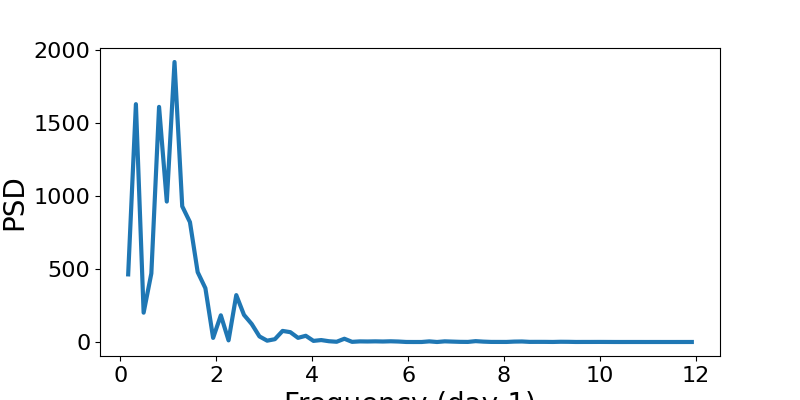

In [173]:
import scipy as sp
speed_fft = sp.fftpack.fft(s.values)
speed_psd = np.abs(speed_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(speed_psd))
i = fftfreq > 0
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(24*frequ*fftfreq[i], speed_psd[i])
ax.set_xlabel('Frequency (day-1)')
ax.set_ylabel('PSD')

In [156]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


<AxesSubplot:xlabel='time_since_emergence'>

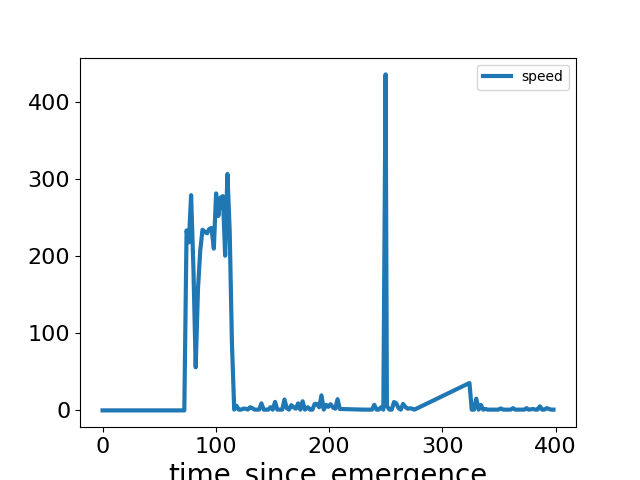

In [45]:
time_hypha_info.loc[time_hypha_info['Plate'] == plate and time_hypha_info['end'].astype(int) == hypha]

KeyError: 'Plate'

In [49]:
time_hypha_info['unique_id'].astype(str).str[:4]

0       1045
1       1045
2       1045
3       1045
4       1045
        ... 
5688    5220
5689    5220
5690    5220
5691    5220
5692    5220
Name: unique_id, Length: 5693, dtype: object

In [13]:
def get_branch(row):
    if row['Plate']==94:
        hyph = row['end']
        name = f'branches/ts_{hyph}_auto.npy'
        if not os.path.isfile(name):
            return(None)
        else:
            t_real = np.load(name)
            return(row['time_since_emergence'] in t_real)
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [ ]:
actual_list_hyph = list(np.load('actual_list_hyph.npy'))
actual_list_hyph.remove(57138)
for hyph in actual_list_hyph:
    t_real = np.load(f'branches/ts_{hyph}_auto.npy')

In [213]:
plate = 792
select_time_plate = time_plate_info.loc[time_plate_info['Plate']==plate]
last_time = np.max(select_time_plate.loc[select_time_plate['out_study']==0]['time_since_begin'])
select_time = time_hypha_info.loc[time_hypha_info['Plate']==plate]
select_global = global_hypha_info.loc[global_hypha_info['Plate']==plate]
select_global = select_global.loc[select_global['lapse']>40]
select_global = select_global.loc[select_global['mean_speed']>60]

hyphae_interest= select_global['hypha'].unique()
select_time = select_time.loc[select_time['end'].isin(hyphae_interest)]
select_time = select_time.loc[select_time['has_reached_final_pos']=='False']
select_time = select_time.loc[select_time['speed'].between(100,400)]
# select_time = select_time.loc[select_time['distance_final_pos']>100]
select_time = select_time.loc[select_time['in_ROI']=='True']
# select_time = select_time.loc[select_time['time_since_begin_exp']<=last_time]

hyphae_interest = select_time['end'].unique()

In [73]:
hyphae_interest

array([950, 1434, 2060, 2701, 3356, 3382, 3597, 3984, 4467, 4654, 5343,
       6440, 6671, 7375, 5996, 8107, 8667, 9238, 9514, 10841, 11502,
       11511, 12008, 12887, 13203, 13601, 15136, 15611, 16525, 18032,
       18318, 18324, 19063, 19244, 22589, 24276, 24694, 26023, 26197,
       28210, 30088, 31084, 33022, 42497, 52186, 69585, 77733, 99185,
       100086, 126049, 173722, 211522, 204763], dtype=object)

In [258]:
tot = 1
hyph_plot = [choice(hyphae_interest) for i in range(tot)]
hyph = hyph_plot[0]
# hyph = 139
to_plot = select_time.loc[(select_time['end']==hyph)]
# av_lapse = int(np.mean(to_plot['timedelta'])*15)
av_lapse = 49
f = interp1d(to_plot['time_since_begin_exp'], to_plot['speed'])
deb = np.min(to_plot['time_since_begin_exp'])
end = np.max(to_plot['time_since_begin_exp'])
frequ = 1
x = np.linspace(deb,end,int((end-deb)*frequ)+1)
resampled = pd.DataFrame({'time':x,'speed':f(x)})
reg = LinearRegression().fit(x.reshape((-1, 1)), f(x))
resampled['speed_smooth']=resampled['speed'].rolling(30,center= True).mean()
resampled['speed_smooth2']= savgol_filter(resampled['speed'], av_lapse*frequ, 3)

resampled['speed_residual'] = resampled['speed']-reg.predict(x.reshape((-1, 1)))
resampled['speed_residual2'] = resampled['speed']-resampled['speed_smooth']
resampled['speed_residual3'] = resampled['speed']-resampled['speed_smooth2']

resampled['speed_residual_ZMUV'] = (resampled['speed_residual']-np.mean(resampled['speed_residual']))/np.std(resampled['speed_residual'])
resampled['speed_residual_ZMUV2'] = (resampled['speed_residual2']-np.mean(resampled['speed_residual2']))/np.std(resampled['speed_residual2'])
resampled['speed_residual_ZMUV3'] = (resampled['speed_residual3']-np.mean(resampled['speed_residual3']))/np.std(resampled['speed_residual3'])

In [259]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(x,resampled['speed'])
# ax.plot(x,reg.predict(x.reshape((-1, 1))))
# ax.plot(x,resampled['speed_residual_ZMUV3'])
ax.plot(x,resampled['speed'])
ax.plot(x,resampled['speed_smooth2'])
# ax.plot(x,yhat)
ax.set_xlabel('time (h)')
ax.set_ylabel('speed ($\mu  m.h^{-1})$')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'speed ($\\mu  m.h^{-1})$')

In [238]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(x,resampled['speed'])
# ax.plot(x,reg.predict(x.reshape((-1, 1))))
ax.plot(x,resampled['speed_residual_ZMUV'])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [253]:
plt.close("all")
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

s = resampled[~np.isnan(resampled['speed_residual_ZMUV'].astype(np.float))]['speed_residual_ZMUV']
autoc = autocorr(s)
autoc = autoc/autoc.max()
ax.plot(autoc,label='linear regression')

s = resampled[~np.isnan(resampled['speed_residual_ZMUV3'].astype(np.float))]['speed_residual_ZMUV3']
autoc = autocorr(s)
autoc = autoc/autoc.max()
ax.plot(autoc, label = 'savgol filter')
ax.set_xlabel('lag (h)')
# plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'lag (h)')

In [236]:
speed_fft = sp.fftpack.fft(s)
speed_psd = np.abs(speed_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(speed_psd))
i = fftfreq > 0
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(speed_psd[i]))
ax.set_xlabel('Frequency')
ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD (dB)')

In [240]:
speed_fft = sp.fftpack.fft(s)
speed_psd = np.abs(speed_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(speed_psd))
i = fftfreq > 0
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(24*frequ*fftfreq[i], speed_psd[i])
ax.set_xlabel('Frequency (day-1)')
ax.set_ylabel('PSD')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD')

In [208]:
average_lapse = 49
autocor = pd.DataFrame(columns = ['lag','amp','hyph'])
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for hyph in hyphae_interest:
# for hyph in actual_list_hyph:
    print(hyph)
    to_plot = select_time.loc[select_time['end']==hyph]
    if len(to_plot)>20:
        f = interp1d(to_plot['time_since_begin_exp'], to_plot['speed'])
        deb = np.min(to_plot['time_since_begin_exp'])
        end = np.max(to_plot['time_since_begin_exp'])
        frequ = 1
        x = np.linspace(deb,deb+int((end-deb)*frequ),int((end-deb)*frequ)+1)
        resampled = pd.DataFrame({'time':x,'speed':f(x)})
    #     reg = LinearRegression().fit(x.reshape((-1, 1)), f(x))
    #     resampled['speed_smooth']=resampled['speed'].rolling(average_lapse,min_periods=average_lapse//2,center=True).mean()
        if len(resampled)>average_lapse+1:
            resampled['speed_smooth2']= savgol_filter(resampled['speed'], average_lapse, 3)

        #     resampled['speed_residual'] = resampled['speed']-reg.predict(x.reshape((-1, 1)))
        #     resampled['speed_residual2'] = resampled['speed']-resampled['speed_smooth']
        #     resampled['speed_residual_ZMUV'] = (resampled['speed_residual']-np.mean(resampled['speed_residual']))/np.std(resampled['speed_residual'])
            resampled['speed_residual3'] = resampled['speed']-resampled['speed_smooth2']
            resampled['speed_residual_ZMUV3'] = (resampled['speed_residual3']-np.mean(resampled['speed_residual3']))/np.std(resampled['speed_residual3'])
            s = resampled[~np.isnan(resampled['speed_residual_ZMUV3'].astype(np.float))]['speed_residual_ZMUV3']
            s = s[:80]
            autoc = autocorr(s)
            autoc = autoc/autoc.max()
            ax.plot(autoc)
            ax.set_xlabel('lag (h)')
            data = [{'lag' : lag,'amp' : auto,'hyph' : hyph} for lag,auto in enumerate(autoc)]
            autocor=autocor.append(data,ignore_index=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

1
19
56
139
164
1663
5994
6178
6992
7424
9150
9418
9612
10389
10617
13033
15235
18054
18897
22207
24489
27816
31802
37105


In [209]:
df = pd.concat([autocor.groupby('lag')['amp'].mean()], axis=1).copy()
df = df.sort_index()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(df.index,df['amp'])
# ax.set_xlim(2, 20)
ax.set_xlabel('Period (hour)')
ax.set_ylabel('autocor')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'autocor')

In [248]:
fourrier = pd.DataFrame(columns = ['frequ','amp','hyph'])
average_lapse = 27
for average_lapse in [45]:
#     for hyph in actual_list_hyph:
    for hyph in hyphae_interest:
        to_plot = select_time.loc[select_time['end']==hyph]
        T = 71
        if len(to_plot)>T//4:
            f = interp1d(to_plot['time_since_begin_exp'], to_plot['speed'])
            deb = np.min(to_plot['time_since_begin_exp'])
            end = np.max(to_plot['time_since_begin_exp'])
            if end-deb>T:
                frequ = 1
            #     x = np.linspace(deb,deb+int((end-deb)*frequ),int((end-deb)*frequ)+1)
                x = np.linspace(deb,deb+T,T+1)
                resampled = pd.DataFrame({'time':x,'speed':f(x)})
                reg = LinearRegression().fit(x.reshape((-1, 1)), f(x))
                resampled['speed_smooth']=resampled['speed'].rolling(average_lapse,min_periods=average_lapse//2,center=True).mean()
                resampled['speed_smooth2']= savgol_filter(resampled['speed'], average_lapse, 3)

                resampled['speed_residual'] = resampled['speed']-reg.predict(x.reshape((-1, 1)))
                resampled['speed_residual2'] = resampled['speed']-resampled['speed_smooth']
                resampled['speed_residual3'] = resampled['speed']-resampled['speed_smooth2']
                resampled['speed_residual_ZMUV'] = (resampled['speed_residual']-np.mean(resampled['speed_residual']))/np.std(resampled['speed_residual'])
                resampled['speed_residual_ZMUV2'] = (resampled['speed_residual2']-np.mean(resampled['speed_residual2']))/np.std(resampled['speed_residual2'])
                resampled['speed_residual_ZMUV3'] = (resampled['speed_residual3']-np.mean(resampled['speed_residual3']))/np.std(resampled['speed_residual3'])
                if len(resampled)>average_lapse:
                    s = resampled[~np.isnan(resampled['speed_residual_ZMUV3'].astype(np.float))]['speed_residual_ZMUV3']
                    if len(s)==T+1:
                        speed_fft = sp.fftpack.fft(s)
                        speed_psd = np.abs(speed_fft) ** 2
                        fftfreq = sp.fftpack.fftfreq(len(speed_psd))
                        i = fftfreq > 0
                        data = [{'frequ' : fftfreq[j]*frequ,'amp' : speed_psd[j],'hyph' : hyph} for j,v in enumerate(i) if v]
                        fourrier=fourrier.append(data,ignore_index=True)

In [249]:
df = pd.concat([fourrier.groupby('frequ')['amp'].mean()], axis=1).copy()
df = df.sort_index()
df['amp_smooth'] = df['amp'].rolling(window=1,min_periods = 1, center=True).mean()

In [250]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(24*df.index,df['amp'])
# ax.set_xlim(0, 1)
ax.set_xlabel('Frequency (day-1)')
ax.set_ylabel('PSD')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD')

In [1119]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(df.index,10*np.log10(df['amp']))
# ax.set_xlim(0, 1)
ax.set_xlabel('Frequency (h-1)')
ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD (dB)')

In [788]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(1/df.index,10*np.log(df['amp_smooth']))
# ax.set_xlim(2, 20)
ax.set_xlabel('Period (hour)')
ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD (dB)')

In [741]:
num = 40
window = np.linspace(0,0.5,num)
means = []
for i in range(num-1):
    begin,end = window[i],window[i+1]
    select = fourrier.loc[fourrier['frequ'].between(begin,end)]
    means.append(10*np.log10(np.mean(select['amp'])))

In [743]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(window[:-1],means)
# ax.set_xlim(2, 20)
ax.set_xlabel('Period (hour)')
ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD (dB)')

In [698]:
fourrier = pd.DataFrame(columns = ['frequ','amp','hyph'])
speed_fft = sp.fftpack.fft(s)
speed_psd = np.abs(speed_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(speed_psd))
i = fftfreq > 0
data = [{'frequ' : fftfreq[j]*frequ,'amp' : speed_psd[j],'hyph' : hyph} for j,v in enumerate(i) if v]
fourrier=fourrier.append(data,ignore_index=True)
df = pd.concat([fourrier.groupby('frequ')['amp'].mean()], axis=1).copy()
df = df.sort_index()
df['amp_smooth'] = df['amp'].rolling(window=20,min_periods = 5, center=True).mean()

In [699]:
df = pd.concat([fourrier.groupby('frequ')['amp'].mean()], axis=1).copy()
df = df.sort_index()
df['amp_smooth'] = df['amp'].rolling(window=1,min_periods = 1, center=True).mean()

In [700]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(10*np.log(df['amp_smooth']))
# ax.set_xlim(0, 1)
ax.set_xlabel('Frequency (h-1)')
ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD (dB)')

In [572]:
df = pd.concat([fourrier.groupby('frequ')['amp'].mean()], axis=1).copy()
df = df.sort_index()
df['amp_smooth'] = df['amp'].rolling(window=40,min_periods = 10, center=True).mean()

In [562]:
len(fourrier['frequ'].unique())

426

In [27]:
speed_psd,fftfreq[i]

(array([3.07806691e+07, 1.53380296e+05, 2.33410384e+04, 1.59928264e+04,
        1.55283406e+03, 2.69996607e+04, 7.58228152e+03, 1.16144952e+03,
        6.49490182e+03, 2.84099624e+03, 1.04307044e+04, 1.04307044e+04,
        2.84099624e+03, 6.49490182e+03, 1.16144952e+03, 7.58228152e+03,
        2.69996607e+04, 1.55283406e+03, 1.59928264e+04, 2.33410384e+04,
        1.53380296e+05]),
 array([0.04761905, 0.0952381 , 0.14285714, 0.19047619, 0.23809524,
        0.28571429, 0.33333333, 0.38095238, 0.42857143, 0.47619048]))

In [112]:
select_time = time_hypha_info.loc[time_hypha_info['Plate']==plate]
select_time = select_time.loc[select_time['distance_final_pos']>100]
select_time = select_time.loc[select_time['in_ROI']=='True']
select_time = select_time.loc[select_time['speed'].between(100,400)]
select_global = global_hypha_info.loc[global_hypha_info['Plate']==plate]
select_global = select_global.loc[select_global['lapse']>10]
hyphae_interest= select_global['hypha'].unique()

In [328]:
fourrier = pd.DataFrame(columns = ['frequ','amp','hyph'])
sample_frequ = 1
for plate in [94]:
    select_time = time_hypha_info.loc[time_hypha_info['Plate']==plate]
    select_time = select_time.loc[select_time['distance_final_pos']>100]
    select_time = select_time.loc[select_time['in_ROI']=='True']
    select_time = select_time.loc[select_time['speed'].between(20,400)]
#     select_time = select_time.loc[select_time['timedelta'].between(sample_frequ-0.1,sample_frequ+0.1)]
    select_global = global_hypha_info.loc[global_hypha_info['Plate']==plate]
    select_global = select_global.loc[select_global['lapse']>10]
    hyphae_interest= select_global['hypha'].unique()
#     for hyph in hyphae_interest:
    for hyph in actual_list_hyph:
        to_plot = select_time.loc[(select_time['end']==hyph)&(select_time['Plate']==plate)]
        if len(to_plot)>0:
            speed_fft = sp.fftpack.fft(to_plot['speed'])
            speed_psd = np.abs(speed_fft) ** 2
            fftfreq = sp.fftpack.fftfreq(len(speed_psd))
            i = fftfreq > 0
            data = [{'frequ' : fftfreq[j]/sample_frequ,'amp' : speed_psd[j],'hyph' : hyph} for j,v in enumerate(i) if v]
            fourrier=fourrier.append(data,ignore_index=True)

In [818]:
df = pd.concat([fourrier.groupby('frequ')['amp'].mean()], axis=1).copy()
df = df.sort_index()
df['amp_smooth'] = df['amp'].rolling(window=50,min_periods = 20, center=True).mean()

In [332]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(1/df.index,10*np.log(df['amp_smooth']))
ax.set_xlim(2, 20)
ax.set_xlabel('Period (hour)')
ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD (dB)')

In [327]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(10*np.log(df['amp_smooth']))
# ax.set_xlim(0, 1)
ax.set_xlabel('Frequency (h-1)')
ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD (dB)')

In [173]:
num = 20
window = np.linspace(0,0.5,num)
means = []
for i in range(num-1):
    begin,end = window[i],window[i+1]
    select = fourrier.loc[fourrier['frequ'].between(begin,end)]
    means.append(10*np.log10(np.mean(select['amp'])))

In [901]:
num_sample = 100
maxi = 100
x = np.linspace(0,maxi,num_sample)
frequ = 0.2
s = 0*np.sqrt(x)+np.sin(2*frequ*np.pi*x)
s+=np.random.normal(0,2,len(x))
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, s)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD (dB)')

In [902]:

speed_fft = sp.fftpack.ifft(s)
speed_psd = np.abs(speed_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(speed_psd))
i = fftfreq > 0
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i]*num_sample/maxi, 10 * np.log10(speed_psd[i]))
ax.set_xlabel('Frequency')
ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD (dB)')

In [903]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i]*num_sample/maxi, speed_psd[i])
ax.set_xlabel('Frequency')
ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD (dB)')

In [904]:
autoc = autocorr(s)
autoc = autoc/autoc.max()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(autoc)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [905]:
from scipy import signal
f,P = signal.periodogram(s,fs = num_sample/maxi)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(f, P)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [403]:
average_lapse = 25
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# for hyph in actual_list_hyph:
# for hyph in [1]:
for hyph in hyphae_interest:

    to_plot = select_time.loc[select_time['end']==hyph]
    deb = np.min(to_plot['time_since_begin_exp'])
    end = np.max(to_plot['time_since_begin_exp'])
    T = 60
    if end-deb>T:
        f = interp1d(to_plot['time_since_begin_exp'], to_plot['speed'])
        frequ = 1
    #     x = np.linspace(deb,deb+int((end-deb)*frequ),int((end-deb)*frequ)+1)
        x = np.linspace(deb,deb+T,T+1)
        resampled = pd.DataFrame({'time':x,'speed':f(x)})
    #     reg = LinearRegression().fit(x.reshape((-1, 1)), f(x))
#         resampled['speed_smooth']=resampled['speed'].rolling(average_lapse,min_periods=average_lapse//2,center=True).mean()
        resampled['speed_smooth2']= savgol_filter(resampled['speed'], average_lapse, 3)

    #     resampled['speed_residual'] = resampled['speed']-reg.predict(x.reshape((-1, 1)))
#         resampled['speed_residual2'] = resampled['speed']-resampled['speed_smooth']
        resampled['speed_residual3'] = resampled['speed']-resampled['speed_smooth2']
        #     resampled['speed_residual_ZMUV'] = (resampled['speed_residual']-np.mean(resampled['speed_residual']))/np.std(resampled['speed_residual'])
#         resampled['speed_residual_ZMUV2'] = (resampled['speed_residual2']-np.mean(resampled['speed_residual2']))/np.std(resampled['speed_residual2'])
        resampled['speed_residual_ZMUV3'] = (resampled['speed_residual3']-np.mean(resampled['speed_residual3']))/np.std(resampled['speed_residual3'])
        if len(resampled)>average_lapse:
            s = resampled[~np.isnan(resampled['speed_residual_ZMUV3'].astype(np.float))]['speed_residual_ZMUV3']
            if len(s)==T+1:
                print(hyph)
                speed_fft = sp.fftpack.fft(s)
                speed_psd = np.abs(speed_fft) ** 2
                fftfreq = sp.fftpack.fftfreq(len(speed_psd))
                i = fftfreq > 0
                ax.plot(24*fftfreq[i], speed_psd[i])
                ax.set_xlabel('Frequency (day-1)')
                ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

1434
2060
2701
3356
3382
3984


In [756]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for average_lapse in [21,27,33,39,45,49]:
    fourrier = pd.DataFrame(columns = ['frequ','amp','hyph'])
    for hyph in actual_list_hyph:
#     for hyph in hyphae_interest:
        to_plot = select_time.loc[select_time['end']==hyph]
        if len(to_plot)>T//2:
            f = interp1d(to_plot['time_since_begin_exp'], to_plot['speed'])
            deb = np.min(to_plot['time_since_begin_exp'])
            end = np.max(to_plot['time_since_begin_exp'])
            T = 60
            if end-deb>T:
                frequ = 1
            #     x = np.linspace(deb,deb+int((end-deb)*frequ),int((end-deb)*frequ)+1)
                x = np.linspace(deb,deb+T,T+1)
                resampled = pd.DataFrame({'time':x,'speed':f(x)})
            #     reg = LinearRegression().fit(x.reshape((-1, 1)), f(x))
        #         resampled['speed_smooth']=resampled['speed'].rolling(average_lapse,min_periods=average_lapse//2,center=True).mean()
                resampled['speed_smooth2']= savgol_filter(resampled['speed'], average_lapse, 3)

            #     resampled['speed_residual'] = resampled['speed']-reg.predict(x.reshape((-1, 1)))
        #         resampled['speed_residual2'] = resampled['speed']-resampled['speed_smooth']
                resampled['speed_residual3'] = resampled['speed']-resampled['speed_smooth2']
                #     resampled['speed_residual_ZMUV'] = (resampled['speed_residual']-np.mean(resampled['speed_residual']))/np.std(resampled['speed_residual'])
        #         resampled['speed_residual_ZMUV2'] = (resampled['speed_residual2']-np.mean(resampled['speed_residual2']))/np.std(resampled['speed_residual2'])
                resampled['speed_residual_ZMUV3'] = (resampled['speed_residual3']-np.mean(resampled['speed_residual3']))/np.std(resampled['speed_residual3'])
                if len(resampled)>average_lapse:
                    s = resampled[~np.isnan(resampled['speed_residual_ZMUV3'].astype(np.float))]['speed_residual_ZMUV3']
                    if len(s)==T+1:
                        print(hyph)
                        speed_fft = sp.fftpack.fft(s)
                        speed_psd = np.abs(speed_fft) ** 2
                        fftfreq = sp.fftpack.fftfreq(len(speed_psd))
                        i = fftfreq > 0
                        data = [{'frequ' : fftfreq[j]*frequ,'amp' : speed_psd[j],'hyph' : hyph} for j,v in enumerate(i) if v]
                        fourrier=fourrier.append(data,ignore_index=True)
    df = pd.concat([fourrier.groupby('frequ')['amp'].mean()], axis=1).copy()
    df = df.sort_index()
    df['amp_smooth'] = df['amp'].rolling(window=1,min_periods = 1, center=True).mean()
    ax.plot(24*df.index,df['amp'],label=f'smoothing size {average_lapse}')
    # ax.set_xlim(0, 1)
    ax.set_xlabel('Frequency (day-1)')
    ax.set_ylabel('PSD')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

1
139
19
164
1
139
19
164
1
139
19
164
1
139
19
164
1
139
19
164
1
139
19
164


In [158]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
average_lapse = 45
order = 3
for plate in [94,792,152,88]:
    fourrier = pd.DataFrame(columns = ['frequ','amp','hyph'])
#     for hyph in actual_list_hyph:
    for hyph in hyphae_interest:
        to_plot = select_time.loc[select_time['end']==hyph]
        if len(to_plot)>T//2:
            f = interp1d(to_plot['time_since_begin_exp'], to_plot['speed'])
            deb = np.min(to_plot['time_since_begin_exp'])
            end = np.max(to_plot['time_since_begin_exp'])
            T = 60
            if end-deb>T:
                frequ = 1
            #     x = np.linspace(deb,deb+int((end-deb)*frequ),int((end-deb)*frequ)+1)
                x = np.linspace(deb,deb+T,T+1)
                resampled = pd.DataFrame({'time':x,'speed':f(x)})
            #     reg = LinearRegression().fit(x.reshape((-1, 1)), f(x))
        #         resampled['speed_smooth']=resampled['speed'].rolling(average_lapse,min_periods=average_lapse//2,center=True).mean()
                resampled['speed_smooth2']= savgol_filter(resampled['speed'], average_lapse, order)

            #     resampled['speed_residual'] = resampled['speed']-reg.predict(x.reshape((-1, 1)))
        #         resampled['speed_residual2'] = resampled['speed']-resampled['speed_smooth']
                resampled['speed_residual3'] = resampled['speed']-resampled['speed_smooth2']
                #     resampled['speed_residual_ZMUV'] = (resampled['speed_residual']-np.mean(resampled['speed_residual']))/np.std(resampled['speed_residual'])
        #         resampled['speed_residual_ZMUV2'] = (resampled['speed_residual2']-np.mean(resampled['speed_residual2']))/np.std(resampled['speed_residual2'])
                resampled['speed_residual_ZMUV3'] = (resampled['speed_residual3']-np.mean(resampled['speed_residual3']))/np.std(resampled['speed_residual3'])
                if len(resampled)>average_lapse:
                    s = resampled[~np.isnan(resampled['speed_residual_ZMUV3'].astype(np.float))]['speed_residual_ZMUV3']
                    if len(s)==T+1:
                        print(hyph)
                        speed_fft = sp.fftpack.fft(s)
                        speed_psd = np.abs(speed_fft) ** 2
                        fftfreq = sp.fftpack.fftfreq(len(speed_psd))
                        i = fftfreq > 0
                        data = [{'frequ' : fftfreq[j]*frequ,'amp' : speed_psd[j],'hyph' : hyph} for j,v in enumerate(i) if v]
                        fourrier=fourrier.append(data,ignore_index=True)
    df = pd.concat([fourrier.groupby('frequ')['amp'].mean()], axis=1).copy()
    df = df.sort_index()
    df['amp_smooth'] = df['amp'].rolling(window=1,min_periods = 1, center=True).mean()
    ax.plot(24*df.index,df['amp'],label=plate)
    # ax.set_xlim(0, 1)
    ax.set_xlabel('Frequency (day-1)')
    ax.set_ylabel('PSD')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'actual_list_hyph' is not defined

In [2]:
time_plate_info = pd.read_pickle("time_plate_infos.pick")
time_plate_info_agg = pd.read_pickle("time_plate_infos_agg.pick")

global_hypha_info = pd.read_pickle("global_hypha_info.pick")
time_hypha_info = pd.read_pickle("global_hypha_info.pick")


plates = time_plate_info['Plate'].unique()
ind_plate_table= {}
for plate in plates:
    ind_plate_table[plate]=time_plate_info.loc[time_plate_info['Plate']==plate].copy()
    

plates = global_hypha_info['Plate'].unique()
ind_hypha_table = {}
for plate in plates:
    ind_hypha_table[plate]=global_hypha_info.loc[global_hypha_info['Plate']==plate].copy()

for plate in plates:
    table = ind_plate_table[plate]

for plate in plates:
    table = ind_plate_table[plate]
    table['total_length_m'] = table['tot_length_study']/10**6
    table['speed'] = table['tot_length_study'].diff(5)/table['time_since_begin'].diff(5)
    table['mean_step'] = np.mean(table['time_since_begin'].diff(1))
    table['density'] = table['tot_length_study']/(table['area_sep_comp']+1)
    table['ring_density'] = table['tot_length_study'].diff(10)/(table['area_sep_comp'].diff(10)+1)
    table['log_length_study'] = np.log2(table['tot_length_study'].astype(float))
    table['local_growth_rate'] = table['log_length_study'].diff(5)/table['time_since_begin'].diff(5)*24
    table_hypha = ind_hypha_table[plate]

for plate in plates:
    table = ind_plate_table[plate]
    table['time_since_begin2']=table['time_since_begin']

ind_plate_table[91]['time_since_begin2']=ind_plate_table[91]['time_since_begin']-300

for plate in plates:
    table = ind_plate_table[plate]
    table_hypha = ind_hypha_table[plate]
    table_hypha['num_branch']=table_hypha['num_branch'].fillna(-1)
    table_hypha['tot_growth_C']=table_hypha['tot_growth_C'].fillna(0)
    table_hypha['branch_frequ'] = table_hypha['tot_growth_C'].div(table_hypha['num_branch'])/1000
    table_hypha['branch_frequ_time']=table_hypha['branch_frequ']*table_hypha['mean_speed']
    def get_number_new_branch(row):
        time = row['time_since_begin']
        growth_num = len(table_hypha.loc[(table_hypha['time_init_growth'] == time) &((table_hypha['time_stop_growth'] != time))])
        return(growth_num)
    def get_number_stop_growth(row):
        time = row['time_since_begin']
        growth_num = len(table_hypha.loc[(table_hypha['time_stop_growth'] == time) &((table_hypha['time_init_growth'] != time))&((table_hypha['timestep_stop_growth'] != table_hypha['strop_track']))&(table_hypha['out_of_ROI'].isnull())])
        return(growth_num)
    def get_mean_length_hyphae(row):
        time = row['time_since_begin']
        mean_length = np.mean(table_hypha.loc[(table_hypha['time_init_growth'] == time) &((table_hypha['time_stop_growth'] != time))&((table_hypha['timestep_stop_growth'] != table_hypha['strop_track']))&(table_hypha['out_of_ROI'].isnull())]['tot_growth_C'])
        return(mean_length)
    def get_mean_speed_hyphae(row):
        time = row['time_since_begin']
        mean_length = np.mean(table_hypha.loc[(table_hypha['time_init_growth'] == time) &((table_hypha['time_stop_growth'] != time))]['mean_speed'])
        return(mean_length)
    def get_mean_growth_lapse_hyphae(row):
        time = row['time_since_begin']
        selection = table_hypha.loc[(table_hypha['time_init_growth'] == time) &((table_hypha['time_stop_growth'] != time))&((table_hypha['timestep_stop_growth'] != table_hypha['strop_track']))&(table_hypha['out_of_ROI'].isnull())]
        mean_lapse = np.mean(selection['time_stop_growth']-selection['time_init_growth'])/24
        return(mean_lapse)
    def get_mean_growth_arrest_frequ(row):
        time = row['time_since_begin']
        selection = table_hypha.loc[(table_hypha['time_init_growth'] == time) &((table_hypha['time_stop_growth'] != time))&((table_hypha['timestep_stop_growth'] != table_hypha['strop_track']))&(table_hypha['out_of_ROI'].isnull())]
        mean_lapse = np.mean(1/(selection['time_stop_growth']-selection['time_init_growth']))*24
        return(mean_lapse)
    def get_branch_frequ_micro(row):
        time = row['time_since_begin']
        selection = table_hypha.loc[(table_hypha['time_init_growth'] == time) &((table_hypha['time_stop_growth'] != time))&((table_hypha['timestep_stop_growth'] != table_hypha['strop_track']))&(table_hypha['out_of_ROI'].isnull())]
        mean_branch_frequ = np.mean(selection.loc[(selection['branch_frequ']>0)& (selection['branch_frequ']<10)]['branch_frequ'])
        return(mean_branch_frequ)
    def get_branch_frequ_micro_time(row):
        time = row['time_since_begin']
        selection = table_hypha.loc[(table_hypha['time_init_growth'] == time) &((table_hypha['time_stop_growth'] != time))&((table_hypha['timestep_stop_growth'] != table_hypha['strop_track']))&(table_hypha['out_of_ROI'].isnull())]
        mean_branch_frequ = np.mean(selection.loc[(selection['branch_frequ']>0)& (selection['branch_frequ']<10)]['branch_frequ_time'])/1000*24
        return(mean_branch_frequ)
    window = int(1/table['mean_step'].unique()*20)
#     window = 5
    table['num_new_tips'] = table.apply (lambda row: get_number_new_branch(row), axis=1)
    table['cum_num_new_tips'] = table['num_new_tips'].cumsum()
#     table['cum_num_new_tips'] = table['num_tips']
    table['branch_frequ'] = table['cum_num_new_tips'].diff(window)/table['tot_length_study'].diff(window)*1000
    table['num_tips_arrest'] = table.apply (lambda row: get_number_stop_growth(row), axis=1)
    table['mean_length_hyphae'] = table.apply (lambda row: get_mean_length_hyphae(row), axis=1)
    table['lapse_tip_arrest'] = table.apply (lambda row: get_mean_growth_lapse_hyphae(row), axis=1)
    table['lapse_tip_arrest_smooth'] = table['lapse_tip_arrest'].rolling(window=window,min_periods=1 ).mean()
    table['frequ_tip_arrest'] = table.apply (lambda row: get_mean_growth_arrest_frequ(row), axis=1)
    table['frequ_tip_arrest_smooth'] = table['frequ_tip_arrest'].rolling(window=window,min_periods=1 ).mean()
    table['rate_tip_arrest'] = 1/table['lapse_tip_arrest_smooth']
    table['mean_length_hyphae_smooth'] = table['mean_length_hyphae'].rolling(window=window*2,min_periods=1).mean()
    table['mean_speed_hyphae'] = table.apply (lambda row: get_mean_speed_hyphae(row), axis=1)
    table['mean_speed_hyphae_smooth'] = table['mean_speed_hyphae'].rolling(window=window,min_periods=1).mean()
    table['branch_frequ_time'] = table['branch_frequ']/1000*table['mean_speed_hyphae_smooth']*24
    table['branch_frequ_micro'] = table.apply (lambda row: get_branch_frequ_micro(row), axis=1)
    table['branch_frequ_micro_smooth'] = table['branch_frequ_micro'].rolling(window=window,min_periods=1).mean()
    table['branch_frequ_micro_time'] = table.apply (lambda row: get_branch_frequ_micro_time(row), axis=1)
    table['branch_frequ_micro_time_smooth'] = table['branch_frequ_micro_time'].rolling(window=window,min_periods=1).mean()
    table['cum_num_tips_arrest'] = table['num_tips_arrest'].cumsum()
    table['log_cum_num_tips_arrest'] = np.log2(table['cum_num_tips_arrest'].astype(float))
    table['local_rate_tip_arrest'] = table['log_cum_num_tips_arrest'].diff(window)/table['time_since_begin'].diff(window)*24
    table['tips_arrest_to_new_length_ratio'] = table['cum_num_tips_arrest'].diff(window)/table['tot_length_study'].diff(window)*1000
    table['log_cum_num_new_tips'] = np.log2(table['cum_num_new_tips'].astype(float))
    table['local_rate_tip_creation'] = table['log_cum_num_new_tips'].diff(window)/table['time_since_begin'].diff(window)*24
    table['local_growth_rate_deduced'] = table['local_rate_tip_creation']-table['rate_tip_arrest']
    table['local_growth_arrest_deduced'] = table['local_growth_rate']-table['local_rate_tip_creation']
    table['alpha_stop'] = table['mean_speed_hyphae_smooth']/table['mean_length_hyphae_smooth']*24
    table['alpha_stop2']= 1/table['lapse_tip_arrest_smooth']

    table['local_growth_rate_deduced_2'] = table['branch_frequ_time']-table['alpha_stop']

C:\Users\coren\anaconda3\envs\cleanMsc\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\coren\anaconda3\envs\cleanMsc\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\coren\anaconda3\envs\cleanMsc\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\coren\anaconda3\envs\cleanMsc\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\coren\anaconda3\envs\cleanMsc\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\coren\anaconda3\envs\cleanMsc\lib\site-packages\pan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget
plt.close('all')
import numpy as np
from random import choice
import os
import scipy as sp
import scipy.fftpack
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter

path_save = r"C:\Users\coren\Dropbox\Apps\Snellius2\data_tables\time_plate_infos_agg.pick"

time_plate_info_agg = pd.read_pickle(path_save)

In [23]:
table['time_since_begin']

10     20.000000
11     22.000000
12     24.000000
13     26.000000
14     28.000000
         ...    
74    181.433333
75    185.450000
76    187.450000
77    189.466667
78    191.466667
Name: time_since_begin, Length: 69, dtype: float64

In [59]:
from datetime import datetime

plate = 758
# table = ind_plate_table[plate].loc[ind_plate_table[plate]['out_study']==False]
table = time_plate_info_agg.loc[time_plate_info_agg['t'].between(0,78)]
# table = ind_plate_table[plate]
# table = table.loc[(np.abs(table['total_length_m']-0.5716619403117118)>0.01)&(np.abs(table['total_length_m']-0.954)>0.01)]
y = 'total_length_m'
table['total_length_m'] = table['tot_length_study']/10**6
f = interp1d(table['time_since_begin'], table[y])
g= interp1d(table['time_since_begin'], table['datetime'])

deb = np.min(table['time_since_begin'])
end = np.max(table['time_since_begin'])
frequ = 1
av_lapse = 67
x = np.linspace(deb,end,int((end-deb)*frequ)+1)
# x = x[10:]
resampled = pd.DataFrame({'time':x,y:f(x)})
coefs = np.polyfit(x,resampled[y] ,5)
p = np.poly1d(coefs)
resampled['total_length_m_smooth']=resampled[y].rolling(40,center= True).mean()
resampled['absolute_time']=pd.to_datetime(g(resampled['time']))
resampled['time_of_day']=resampled['absolute_time'].dt.hour

resampled['total_length_m_smooth2']= savgol_filter(resampled[y], av_lapse*frequ, 3)
resampled['total_length_m_smooth3']= p(x)

resampled['total_length_m_residual3'] = resampled[y]-resampled['total_length_m_smooth2']
resampled['total_length_m_residual4'] = resampled[y]-resampled['total_length_m_smooth3']

resampled['total_length_m_residual_ZMUV3'] = (resampled['total_length_m_residual3']-np.mean(resampled['total_length_m_residual3']))/np.std(resampled['total_length_m_residual3'])
resampled['total_length_m_residual_ZMUV4'] = (resampled['total_length_m_residual4']-np.mean(resampled['total_length_m_residual4']))/np.std(resampled['total_length_m_residual4'])

C:\Users\coren\anaconda3\envs\cleanMsc\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [60]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(x,resampled['speed'])
# ax.plot(x,reg.predict(x.reshape((-1, 1))))
# ax.plot(x,resampled['speed_residual_ZMUV3'])
ax.plot(resampled['absolute_time'],resampled['total_length_m'])
ax.plot(resampled['absolute_time'],resampled['total_length_m_smooth2'])
# ax.plot(x,resampled['total_length_m_smooth'])

# ax.plot(x,p(x))
# ax.plot(x,yhat)
ax.set_xlabel('time (h)')
ax.set_ylabel('total length ($\mu  m)$')
ax.set_ylabel('total length (m)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'total length (m)')

In [61]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(x,resampled['speed'])
# ax.plot(x,reg.predict(x.reshape((-1, 1))))
ax.plot(resampled['absolute_time'],resampled['total_length_m_residual_ZMUV3'])
date_form = DateFormatter("%m-%d-%H")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(x,resampled['speed'])
# ax.plot(x,reg.predict(x.reshape((-1, 1))))
averaged = resampled.groupby('time_of_day')['total_length_m_residual_ZMUV3'].mean()
ax.scatter(averaged.index,averaged)
ax.set_xlabel('time of the day (h)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'time of the day (h)')

In [63]:
plt.close("all")
s = resampled[~np.isnan(resampled['total_length_m_residual_ZMUV3'].astype(np.float))]['total_length_m_residual_ZMUV3'].values
s = s[:72]
autoc = autocorr(s)
autoc = autoc/autoc.max()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(autoc)
ax.set_title(f'{plate}')
ax.set_xlabel('lag (h)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'lag (h)')

In [64]:
speed_fft = sp.fftpack.fft(s)
speed_psd = np.abs(speed_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(speed_psd))
i = fftfreq > 0
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(24*frequ*fftfreq[i], speed_psd[i])
ax.set_xlabel('Frequency (day-1)')
ax.set_ylabel('PSD')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD')

In [14]:
speed_fft = sp.fftpack.fft(s)
speed_psd = np.abs(speed_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(speed_psd))
i = fftfreq > 0
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(speed_psd[i]))
ax.set_xlabel('Frequency')
ax.set_ylabel('PSD (dB)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'PSD (dB)')

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
labels = ['SG filter','order 5 polynom fit']
for index,column in enumerate(["total_length_m_residual_ZMUV3",'total_length_m_residual_ZMUV4']):
#     table = ind_plate_table[plate].loc[ind_plate_table[plate]['out_study']==False]
#     f = interp1d(table['time_since_begin'], table['total_length_m'])
#     deb = np.min(table['time_since_begin'])
#     end = np.max(table['time_since_begin'])
#     frequ = 1
#     av_lapse = 49
#     x = np.linspace(deb,end,int((end-deb)*frequ)+1)
#     resampled = pd.DataFrame({'time':x,'total_length_m':f(x)})
#     resampled['total_length_m_smooth2']= savgol_filter(resampled['total_length_m'], av_lapse*frequ, 3)
#     resampled['total_length_m_residual3'] = resampled['total_length_m']-resampled['total_length_m_smooth2']
#     resampled['total_length_m_residual_ZMUV3'] = (resampled['total_length_m_residual3']-np.mean(resampled['total_length_m_residual3']))/np.std(resampled['total_length_m_residual3'])
    s = resampled[~np.isnan(resampled[column].astype(np.float))][column].values
    s = s[:72]
    print(len(s))
    speed_fft = sp.fftpack.fft(s)
    speed_psd = np.abs(speed_fft) ** 2
    fftfreq = sp.fftpack.fftfreq(len(speed_psd))
    i = fftfreq > 0

    ax.plot(24*frequ*fftfreq[i], speed_psd[i],label = labels[index])
    ax.set_xlabel('Frequency (day-1)')
    ax.set_ylabel('PSD')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

72
72


In [140]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for plate in [94,792,152,88]:
    table = ind_plate_table[plate].loc[ind_plate_table[plate]['out_study']==False]
    f = interp1d(table['time_since_begin'], table['total_length_m'])
    deb = np.min(table['time_since_begin'])
    end = np.max(table['time_since_begin'])
    frequ = 1
    av_lapse = 49
    x = np.linspace(deb,end,int((end-deb)*frequ)+1)
    resampled = pd.DataFrame({'time':x,'total_length_m':f(x)})
    resampled['total_length_m_smooth2']= savgol_filter(resampled['total_length_m'], av_lapse*frequ, 3)
    resampled['total_length_m_residual3'] = resampled['total_length_m']-resampled['total_length_m_smooth2']
    resampled['total_length_m_residual_ZMUV3'] = (resampled['total_length_m_residual3']-np.mean(resampled['total_length_m_residual3']))/np.std(resampled['total_length_m_residual3'])
    s = resampled[~np.isnan(resampled['total_length_m_residual_ZMUV3'].astype(np.float))]['total_length_m_residual_ZMUV3'].values
    s = s[:72]
    print(len(s))
    speed_fft = sp.fftpack.fft(s)
    speed_psd = np.abs(speed_fft) ** 2
    fftfreq = sp.fftpack.fftfreq(len(speed_psd))
    i = fftfreq > 0

    ax.plot(24*frequ*fftfreq[i], speed_psd[i],label = plate)
    ax.set_xlabel('Frequency (day-1)')
    ax.set_ylabel('PSD')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

72
72
72
72


In [211]:
from datetime import datetime

plate = 800
table = ind_plate_table[plate].loc[ind_plate_table[plate]['out_study']==False]
table = ind_plate_table[plate]

y = 'total_length_m'
f = interp1d(table['time_since_begin'], table[y])
g= interp1d(table['time_since_begin'], table['datetime'])

deb = np.min(table['time_since_begin'])
end = np.max(table['time_since_begin'])
frequ = 1
av_lapse = 49
x = np.linspace(deb,end,int((end-deb)*frequ)+1)
# x = x[10:]
resampled = pd.DataFrame({'time':x,y:f(x)})
coefs = np.polyfit(x,resampled[y] ,5)
p = np.poly1d(coefs)
resampled['total_length_m_smooth']=resampled[y].rolling(40,center= True).mean()
resampled['absolute_time']=pd.to_datetime(g(resampled['time']))
resampled['total_length_m_smooth2']= savgol_filter(resampled[y], av_lapse*frequ, 3)
resampled['total_length_m_smooth3']= p(x)

resampled['total_length_m_residual3'] = resampled[y]-resampled['total_length_m_smooth2']
resampled['total_length_m_residual4'] = resampled[y]-resampled['total_length_m_smooth3']

resampled['total_length_m_residual_ZMUV3'] = (resampled['total_length_m_residual3']-np.mean(resampled['total_length_m_residual3']))/np.std(resampled['total_length_m_residual3'])
resampled['total_length_m_residual_ZMUV4'] = (resampled['total_length_m_residual4']-np.mean(resampled['total_length_m_residual4']))/np.std(resampled['total_length_m_residual4'])
plate = 785
table = ind_plate_table[plate].loc[ind_plate_table[plate]['out_study']==False]
table = ind_plate_table[plate]

y = 'total_length_m'
f = interp1d(table['time_since_begin'], table[y])
g= interp1d(table['time_since_begin'], table['datetime'])

deb = np.min(table['time_since_begin'])
end = np.max(table['time_since_begin'])
frequ = 1
av_lapse = 49
x = np.linspace(deb,end,int((end-deb)*frequ)+1)
# x = x[10:]
resampled2 = pd.DataFrame({'time':x,y:f(x)})
coefs = np.polyfit(x,resampled2[y] ,5)
p = np.poly1d(coefs)
resampled2['total_length_m_smooth']=resampled2[y].rolling(40,center= True).mean()
resampled2['absolute_time']=pd.to_datetime(g(resampled2['time']))
resampled2['total_length_m_smooth2']= savgol_filter(resampled2[y], av_lapse*frequ, 3)
resampled2['total_length_m_smooth3']= p(x)

resampled2['total_length_m_residual3'] = resampled2[y]-resampled2['total_length_m_smooth2']
resampled2['total_length_m_residual4'] = resampled2[y]-resampled2['total_length_m_smooth3']

resampled2['total_length_m_residual_ZMUV3'] = (resampled2['total_length_m_residual3']-np.mean(resampled2['total_length_m_residual3']))/np.std(resampled2['total_length_m_residual3'])
resampled2['total_length_m_residual_ZMUV4'] = (resampled2['total_length_m_residual4']-np.mean(resampled2['total_length_m_residual4']))/np.std(resampled2['total_length_m_residual4'])
plate = 785
table = ind_plate_table[plate].loc[ind_plate_table[plate]['out_study']==False]
table = ind_plate_table[plate]

y = 'total_length_m'
f = interp1d(table['time_since_begin'], table[y])
g= interp1d(table['time_since_begin'], table['datetime'])

deb = np.min(table['time_since_begin'])
end = np.max(table['time_since_begin'])
frequ = 1
av_lapse = 49
x = np.linspace(deb,end,int((end-deb)*frequ)+1)
# x = x[10:]
resampled2 = pd.DataFrame({'time':x,y:f(x)})
coefs = np.polyfit(x,resampled2[y] ,5)
p = np.poly1d(coefs)
resampled2['total_length_m_smooth']=resampled2[y].rolling(40,center= True).mean()
resampled2['absolute_time']=pd.to_datetime(g(resampled2['time']))
resampled2['total_length_m_smooth2']= savgol_filter(resampled2[y], av_lapse*frequ, 3)
resampled2['total_length_m_smooth3']= p(x)

resampled2['total_length_m_residual3'] = resampled2[y]-resampled2['total_length_m_smooth2']
resampled2['total_length_m_residual4'] = resampled2[y]-resampled2['total_length_m_smooth3']

resampled2['total_length_m_residual_ZMUV3'] = (resampled2['total_length_m_residual3']-np.mean(resampled2['total_length_m_residual3']))/np.std(resampled2['total_length_m_residual3'])
resampled2['total_length_m_residual_ZMUV4'] = (resampled2['total_length_m_residual4']-np.mean(resampled2['total_length_m_residual4']))/np.std(resampled2['total_length_m_residual4'])
plate = 808
# table = ind_plate_table[plate].loc[ind_plate_table[plate]['out_study']==False]
table = ind_plate_table[plate]
table = table.loc[(np.abs(table['total_length_m']-0.5716619403117118)>0.01)&(np.abs(table['total_length_m']-0.954)>0.01)]
y = 'total_length_m'
f = interp1d(table['time_since_begin'], table[y])
g= interp1d(table['time_since_begin'], table['datetime'])

deb = np.min(table['time_since_begin'])
end = np.max(table['time_since_begin'])
frequ = 1
av_lapse = 49
x = np.linspace(deb,end,int((end-deb)*frequ)+1)
# x = x[10:]
resampled3 = pd.DataFrame({'time':x,y:f(x)})
coefs = np.polyfit(x,resampled[y] ,5)
p = np.poly1d(coefs)
resampled3['total_length_m_smooth']=resampled3[y].rolling(40,center= True).mean()
resampled3['absolute_time']=pd.to_datetime(g(resampled3['time']))
resampled3['total_length_m_smooth2']= savgol_filter(resampled3[y], av_lapse*frequ, 3)
resampled3['total_length_m_smooth3']= p(x)

resampled3['total_length_m_residual3'] = resampled3[y]-resampled3['total_length_m_smooth2']
resampled3['total_length_m_residual4'] = resampled3[y]-resampled3['total_length_m_smooth3']

resampled3['total_length_m_residual_ZMUV3'] = (resampled3['total_length_m_residual3']-np.mean(resampled3['total_length_m_residual3']))/np.std(resampled3['total_length_m_residual3'])
resampled3['total_length_m_residual_ZMUV4'] = (resampled3['total_length_m_residual4']-np.mean(resampled3['total_length_m_residual4']))/np.std(resampled3['total_length_m_residual4'])

In [10]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(x,resampled['speed'])
# ax.plot(x,reg.predict(x.reshape((-1, 1))))
ax.plot(resampled['absolute_time'],resampled['total_length_m_residual_ZMUV3'])
ax.plot(resampled2['absolute_time'],resampled2['total_length_m_residual_ZMUV3'])
ax.plot(resampled3['absolute_time'],resampled3['total_length_m_residual_ZMUV3'])
date_form = DateFormatter("%m-%d-%HH")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'resampled2' is not defined

In [141]:
from datetime import datetime
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
accu = pd.DataFrame(columns = ['time','deviation'])
plates = [76,94,102,152,10,88,785,91,80,792]
# plates = [88,792]
for plate in plates:
    table = ind_plate_table[plate].loc[ind_plate_table[plate]['out_study']==False]
    # table = ind_plate_table[plate]
    # table = table.loc[(np.abs(table['total_length_m']-0.5716619403117118)>0.01)&(np.abs(table['total_length_m']-0.954)>0.01)]
    y = 'total_length_m'
    f = interp1d(table['time_since_begin'], table[y])
    g= interp1d(table['time_since_begin'], table['datetime'])

    deb = np.min(table['time_since_begin'])
    end = np.max(table['time_since_begin'])
    frequ = 1
    av_lapse = 49
    x = np.linspace(deb,end,int((end-deb)*frequ)+1)
    # x = x[10:]
    resampled = pd.DataFrame({'time':x,y:f(x)})
    coefs = np.polyfit(x,resampled[y] ,5)
    p = np.poly1d(coefs)
    resampled['total_length_m_smooth']=resampled[y].rolling(40,center= True).mean()
    resampled['absolute_time']=pd.to_datetime(g(resampled['time']))
    resampled['time_of_day']=resampled['absolute_time'].dt.hour

    resampled['total_length_m_smooth2']= savgol_filter(resampled[y], av_lapse*frequ, 3)
    resampled['total_length_m_smooth3']= p(x)

    resampled['total_length_m_residual3'] = resampled[y]-resampled['total_length_m_smooth2']
    resampled['total_length_m_residual4'] = resampled[y]-resampled['total_length_m_smooth3']

    resampled['total_length_m_residual_ZMUV3'] = (resampled['total_length_m_residual3']-np.mean(resampled['total_length_m_residual3']))/np.std(resampled['total_length_m_residual3'])
    resampled['total_length_m_residual_ZMUV4'] = (resampled['total_length_m_residual4']-np.mean(resampled['total_length_m_residual4']))/np.std(resampled['total_length_m_residual4'])
    # ax.plot(x,resampled['speed'])
    # ax.plot(x,reg.predict(x.reshape((-1, 1))))
    averaged = resampled.groupby('time_of_day')['total_length_m_residual_ZMUV3'].mean()
    data = [{'time' : index,'deviation' : average} for index,average in enumerate(averaged)]
    accu=accu.append(data,ignore_index=True)
    ax.plot(averaged.index,averaged,label = plate,alpha = 0.3)
    ax.set_xlabel('time of the day (h)')
accu_mean = accu.groupby('time')['deviation'].mean()
accu_error = accu.groupby('time')['deviation'].std()/np.sqrt(len(plates))

# ax.plot(accu_mean.index,accu_mean,label = 'mean')
# ax.plot(accu_mean-accu_error,color='green')
# ax.plot(accu_mean+accu_error,color='green')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [115]:
from datetime import datetime
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
accu = []
for plate in [76,94,102,152,10,88,785,91,80,792]:
    table = ind_plate_table[plate].loc[ind_plate_table[plate]['out_study']==False]
    # table = ind_plate_table[plate]
    # table = table.loc[(np.abs(table['total_length_m']-0.5716619403117118)>0.01)&(np.abs(table['total_length_m']-0.954)>0.01)]
    y = 'total_length_m'
    f = interp1d(table['time_since_begin'], table[y])
    g= interp1d(table['time_since_begin'], table['datetime'])

    deb = np.min(table['time_since_begin'])
    end = np.max(table['time_since_begin'])
    frequ = 1
    av_lapse = 51
    x = np.linspace(deb,end,int((end-deb)*frequ)+1)
    # x = x[10:]
    resampled = pd.DataFrame({'time':x,y:f(x)})
    coefs = np.polyfit(x,resampled[y] ,5)
    p = np.poly1d(coefs)
    resampled['total_length_m_smooth']=resampled[y].rolling(40,center= True).mean()
    resampled['absolute_time']=pd.to_datetime(g(resampled['time']))
    resampled['time_of_day']=resampled['absolute_time'].dt.hour

    resampled['total_length_m_smooth2']= savgol_filter(resampled[y], av_lapse*frequ, 3)
    resampled['total_length_m_smooth3']= p(x)

    resampled['total_length_m_residual3'] = resampled[y]-resampled['total_length_m_smooth2']
    resampled['total_length_m_residual4'] = resampled[y]-resampled['total_length_m_smooth3']

    resampled['total_length_m_residual_ZMUV3'] = (resampled['total_length_m_residual3']-np.mean(resampled['total_length_m_residual3']))/np.std(resampled['total_length_m_residual3'])
    resampled['total_length_m_residual_ZMUV4'] = (resampled['total_length_m_residual4']-np.mean(resampled['total_length_m_residual4']))/np.std(resampled['total_length_m_residual4'])
    # ax.plot(x,resampled['speed'])
    # ax.plot(x,reg.predict(x.reshape((-1, 1))))
    averaged = resampled.groupby('time_of_day')['total_length_m_residual_ZMUV3'].mean()
    s = resampled[~np.isnan(resampled['total_length_m_residual_ZMUV3'].astype(np.float))]['total_length_m_residual_ZMUV3'].values
    s = s[:51]
    print(len(s))
    autoc = autocorr(s)
    autoc = autoc/autoc.max()
    accu.append(autoc.tolist())
    ax.plot(autoc,label = plate,alpha = 0.2)
mean_autocor = np.mean(np.array(accu),axis=0)
std_autocor = np.std(np.array(accu),axis=0)
error = std_autocor/np.sqrt(len(plates))

ax.plot(mean_autocor,label = 'mean')
ax.plot(mean_autocor-error,color='green')
ax.plot(mean_autocor+error,color='green')

ax.set_xlabel('lag (h)')
ax.set_ylabel('autocorrelation')

ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

51
51
51
51
51
51
51
51
51
51


In [ ]:
fourrier=fourrier.append(data,ignore_index=True)

In [139]:
from datetime import datetime

plate = 88
table = ind_plate_table[plate].loc[ind_plate_table[plate]['out_study']==False]
# table = ind_plate_table[plate]

y = 'total_length_m'
f = interp1d(table['time_since_begin'], table[y])
g= interp1d(table['time_since_begin'], table['datetime'])

deb = np.min(table['time_since_begin'])
end = np.max(table['time_since_begin'])
frequ = 1
av_lapse = 49
x = np.linspace(deb,end,int((end-deb)*frequ)+1)
# x = x[10:]
resampled = pd.DataFrame({'time':x,y:f(x)})
coefs = np.polyfit(x,resampled[y] ,5)
p = np.poly1d(coefs)
resampled['total_length_m_smooth']=resampled[y].rolling(40,center= True).mean()
resampled['absolute_time']=pd.to_datetime(g(resampled['time']))
resampled['total_length_m_smooth2']= savgol_filter(resampled[y], av_lapse*frequ, 3)
resampled['total_length_m_smooth3']= p(x)

resampled['total_length_m_residual3'] = resampled[y]-resampled['total_length_m_smooth2']
resampled['total_length_m_residual4'] = resampled[y]-resampled['total_length_m_smooth3']

resampled['total_length_m_residual_ZMUV3'] = (resampled['total_length_m_residual3']-np.mean(resampled['total_length_m_residual3']))/np.std(resampled['total_length_m_residual3'])
resampled['total_length_m_residual_ZMUV4'] = (resampled['total_length_m_residual4']-np.mean(resampled['total_length_m_residual4']))/np.std(resampled['total_length_m_residual4'])
plate = 792
table = ind_plate_table[plate].loc[ind_plate_table[plate]['out_study']==False]
# table = ind_plate_table[plate]

y = 'total_length_m'
f = interp1d(table['time_since_begin'], table[y])
g= interp1d(table['time_since_begin'], table['datetime'])

deb = np.min(table['time_since_begin'])
end = np.max(table['time_since_begin'])
frequ = 1
av_lapse = 49
x = np.linspace(deb,end,int((end-deb)*frequ)+1)
# x = x[10:]
resampled2 = pd.DataFrame({'time':x,y:f(x)})
coefs = np.polyfit(x,resampled2[y] ,5)
p = np.poly1d(coefs)
resampled2['total_length_m_smooth']=resampled2[y].rolling(40,center= True).mean()
resampled2['absolute_time']=pd.to_datetime(g(resampled2['time']))
resampled2['total_length_m_smooth2']= savgol_filter(resampled2[y], av_lapse*frequ, 3)
resampled2['total_length_m_smooth3']= p(x)

resampled2['total_length_m_residual3'] = resampled2[y]-resampled2['total_length_m_smooth2']
resampled2['total_length_m_residual4'] = resampled2[y]-resampled2['total_length_m_smooth3']

resampled2['total_length_m_residual_ZMUV3'] = (resampled2['total_length_m_residual3']-np.mean(resampled2['total_length_m_residual3']))/np.std(resampled2['total_length_m_residual3'])
resampled2['total_length_m_residual_ZMUV4'] = (resampled2['total_length_m_residual4']-np.mean(resampled2['total_length_m_residual4']))/np.std(resampled2['total_length_m_residual4'])
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(x,resampled['speed'])
# ax.plot(x,reg.predict(x.reshape((-1, 1))))
ax.plot(resampled['absolute_time'],resampled['total_length_m_residual_ZMUV3'])
ax.plot(resampled2['absolute_time'],resampled2['total_length_m_residual_ZMUV3'])
date_form = DateFormatter("%m-%d-%HH")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …